# **COVID-19 Business CaseStudy**



**Data Description:**

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, emerged in late 2019 and rapidly spread globally, leading to significant health, economic, and social impacts. This unprecedented health crisis highlighted the crucial role of data analysis in managing such pandemics. By meticulously tracking and analyzing data on confirmed cases, recoveries, and deaths, policymakers and health professionals can make informed decisions to control the spread of the virus and allocate resources effectively.

**DataSet Info:**

This document describes three key datasets used in a case study on the COVID-19 pandemic:

* **Confirmed Cases Dataset:** Daily cumulative confirmed COVID-19 cases per country/region (Jan 22, 2020 - May 29, 2021; over 270 geographic entries).

* **Deaths Dataset:** Daily cumulative deaths attributed to COVID-19, similar structure to confirmed cases.

* **Recovered Cases Dataset:** Daily cumulative recovered individuals from COVID-19.

All datasets include columns for Province/State, Country/Region, geographic coordinates (Lat, Long), and daily cumulative totals by date.

**Data Analysis Problem:** The data needs to be cleaned, transformed, and analyzed to extract meaningful insights.

**1. Data Load**

In [ ]:
# imported the all the neccessary library for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
# To read csv file data using pandas read_csv function
confirmed = pd.read_csv('/content/covid_19_confirmed_v1_lyst1747728690432.csv')

In [ ]:
# Fetch the top 5 rows from dataset
confirmed.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/20/21  5/21/21  5/22/21  \
0        0        0        0        0  ...    64575    65080    65486   
1        0        0        0        0  ...   132118   132153   132176   
2        0        0        0        0  ...   126156   126434   126651   
3        0        0        0        0  ...    13569    13569    13569   
4        0        0        0        0  ...    31661    31909    32149   

   5/23/21  5/24/21  5/25/21  5/26/21  5/27/21  5/28/21  5/29/21  
0    65728    66275    66903    67743    68366    69130    70111  
1   132209   132215   132229   132244   132264   132285   132297  
2   126860   127107   127361   127646   127926   128198   128456  
3    13569    13569    13664    13671    13682    13693    13693  
4    32441    32623    32933    33338    33607    33944    34180  

[5 rows x 498 columns]

In [ ]:
# To read csv file data using pandas read_csv function
deaths = pd.read_csv('/content/covid_19_deaths_v1_lyst1747728711771.csv')

In [ ]:
# Fetch the top 5 rows from dataset
deaths.head()

Column1         Column2   Column3    Column4  Column5  Column6  \
0  Province/State  Country/Region       Lat       Long  1/22/20  1/23/20   
1             NaN     Afghanistan  33.93911  67.709953        0        0   
2             NaN         Albania   41.1533    20.1683        0        0   
3             NaN         Algeria   28.0339     1.6596        0        0   
4             NaN         Andorra   42.5063     1.5218        0        0   

   Column7  Column8  Column9 Column10  ... Column489 Column490 Column491  \
0  1/24/20  1/25/20  1/26/20  1/27/20  ...   5/20/21   5/21/21   5/22/21   
1        0        0        0        0  ...      2772      2782      2792   
2        0        0        0        0  ...      2440      2441      2442   
3        0        0        0        0  ...      3401      3405      3411   
4        0        0        0        0  ...       127       127       127   

  Column492 Column493 Column494 Column495 Column496 Column497 Column498  
0   5/23/21   5/24/21   5/25/21   5/26/21   5/27/21   5/28/21   5/29/21  
1      2802      2812      2836      2855      2869      2881      2899  
2      2444      2445      2447      2447      2447      2448      2449  
3      3418      3426      3433      3440      3448      3455      3460  
4       127       127       127       127       127       127       127  

[5 rows x 498 columns]

In [ ]:
# Picking the zero'th index row data and assigning to the columns
deaths.columns = deaths.iloc[0]

In [ ]:
# Fetching the data from 1st row till end and resetting or dropping the index and to begin with zero
deaths = deaths[1:].reset_index(drop=True)

The dataset of deaths did not have proper headers, so we added headers to ensure accurate data analysis.


In [ ]:
# Fetch the top 5 rows from dataset
deaths.head()

0 Province/State Country/Region       Lat       Long 1/22/20 1/23/20 1/24/20  \
0            NaN    Afghanistan  33.93911  67.709953       0       0       0   
1            NaN        Albania   41.1533    20.1683       0       0       0   
2            NaN        Algeria   28.0339     1.6596       0       0       0   
3            NaN        Andorra   42.5063     1.5218       0       0       0   
4            NaN         Angola  -11.2027    17.8739       0       0       0   

0 1/25/20 1/26/20 1/27/20  ... 5/20/21 5/21/21 5/22/21 5/23/21 5/24/21  \
0       0       0       0  ...    2772    2782    2792    2802    2812   
1       0       0       0  ...    2440    2441    2442    2444    2445   
2       0       0       0  ...    3401    3405    3411    3418    3426   
3       0       0       0  ...     127     127     127     127     127   
4       0       0       0  ...     704     709     715     725     731   

0 5/25/21 5/26/21 5/27/21 5/28/21 5/29/21  
0    2836    2855    2869    2881    2899  
1    2447    2447    2447    2448    2449  
2    3433    3440    3448    3455    3460  
3     127     127     127     127     127  
4     735     742     745     749     757  

[5 rows x 498 columns]

In [ ]:
# To read csv file data using pandas read_csv function
recovered = pd.read_csv('/content/covid_19_recovered_v1_lyst1747728719904.csv')

In [ ]:
# Fetch the top 5 rows from dataset
recovered.head()

Column1         Column2   Column3    Column4  Column5  Column6  \
0  Province/State  Country/Region       Lat       Long  1/22/20  1/23/20   
1             NaN     Afghanistan  33.93911  67.709953        0        0   
2             NaN         Albania   41.1533    20.1683        0        0   
3             NaN         Algeria   28.0339     1.6596        0        0   
4             NaN         Andorra   42.5063     1.5218        0        0   

   Column7  Column8  Column9 Column10  ... Column489 Column490 Column491  \
0  1/24/20  1/25/20  1/26/20  1/27/20  ...   5/20/21   5/21/21   5/22/21   
1        0        0        0        0  ...     55687     55790     55889   
2        0        0        0        0  ...    127869    128425    128601   
3        0        0        0        0  ...     87902     88066     88208   
4        0        0        0        0  ...     13234     13234     13234   

  Column492 Column493 Column494 Column495 Column496 Column497 Column498  
0   5/23/21   5/24/21   5/25/21   5/26/21   5/27/21   5/28/21   5/29/21  
1     56035     56295     56518     56711     56962     57119     57281  
2    128732    128826    128907    128978    129042    129097    129215  
3     88346     88497     88672     88861     89040     89232     89419  
4     13234     13234     13263     13381     13405     13416     13416  

[5 rows x 498 columns]

In [ ]:
# Picking the zero'th index row data and assigning to the columns
recovered.columns = recovered.iloc[0]

# Fetching the data from 1st row till end and resetting or dropping the index and to begin with zero
recovered = recovered[1:].reset_index(drop=True)

The dataset of recovered did not have proper headers, so we added headers to ensure accurate data analysis.


In [ ]:
# Fetch the top 5 rows from dataset
recovered.head()

0 Province/State Country/Region       Lat       Long 1/22/20 1/23/20 1/24/20  \
0            NaN    Afghanistan  33.93911  67.709953       0       0       0   
1            NaN        Albania   41.1533    20.1683       0       0       0   
2            NaN        Algeria   28.0339     1.6596       0       0       0   
3            NaN        Andorra   42.5063     1.5218       0       0       0   
4            NaN         Angola  -11.2027    17.8739       0       0       0   

0 1/25/20 1/26/20 1/27/20  ... 5/20/21 5/21/21 5/22/21 5/23/21 5/24/21  \
0       0       0       0  ...   55687   55790   55889   56035   56295   
1       0       0       0  ...  127869  128425  128601  128732  128826   
2       0       0       0  ...   87902   88066   88208   88346   88497   
3       0       0       0  ...   13234   13234   13234   13234   13234   
4       0       0       0  ...   26483   26513   26775   26778   27087   

0 5/25/21 5/26/21 5/27/21 5/28/21 5/29/21  
0   56518   56711   56962   57119   57281  
1  128907  128978  129042  129097  129215  
2   88672   88861   89040   89232   89419  
3   13263   13381   13405   13416   13416  
4   27204   27467   27529   27577   27646  

[5 rows x 498 columns]

**2. Data Exploration:**

Q2.1: After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?

Q2.2: Generate plots of confirmed cases over time for the top countries.

Q2.3: Generate plots of confirmed cases over time for China.







**After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?**

In [ ]:
# Displayed the shape of the dataframe (Number of rows, Number of columns)
confirmed.shape

(276, 498)

In [ ]:
# Displayed information about the data, including column names, data types, and non-null counts
confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


In [ ]:
# Provided summary statistics such as mean, median, min, max, and standard deviation for the DataFrame
confirmed.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  274.000000  274.000000  276.000000  276.000000  276.000000  276.000000   
mean    20.447559   22.328281    2.018116    2.373188    3.409420    5.192029   
std     25.189838   74.369096   26.781738   26.879567   33.464159   46.575328   
min    -51.796300 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.933349  -22.036550    0.000000    0.000000    0.000000    0.000000   
50%     21.607878   20.921188    0.000000    0.000000    0.000000    0.000000   
75%     40.950592   83.380449    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       5/20/21  \
count   276.000000   276.000000   276.000000   276.000000  ...  2.760000e+02   
mean      7.673913    10.605072    20.210145    22.344203  ...  5.984867e+05   
std      65.089830    87.699030   215.201418   216.521511  ...  2.797198e+06   
min       0.000000     0.000000     0.000000     0.000000  ...  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  ...  1.316250e+03   
50%       0.000000     0.000000     0.000000     0.000000  ...  1.869000e+04   
75%       0.000000     0.000000     0.000000     0.000000  ...  2.504960e+05   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  3.305676e+07   

            5/21/21       5/22/21       5/23/21       5/24/21       5/25/21  \
count  2.760000e+02  2.760000e+02  2.760000e+02  2.760000e+02  2.760000e+02   
mean   6.007543e+05  6.028478e+05  6.045727e+05  6.062187e+05  6.081457e+05   
std    2.808982e+06  2.819859e+06  2.828976e+06  2.837786e+06  2.847660e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.316250e+03  1.316250e+03  1.316250e+03  1.316250e+03  1.316250e+03   
50%    1.888950e+04  1.897900e+04  1.899650e+04  1.901950e+04  1.904750e+04   
75%    2.512458e+05  2.518208e+05  2.522262e+05  2.525150e+05  2.527770e+05   
max    3.308511e+07  3.310488e+07  3.311774e+07  3.314366e+07  3.316642e+07   

            5/26/21       5/27/21       5/28/21       5/29/21  
count  2.760000e+02  2.760000e+02  2.760000e+02  2.760000e+02  
mean   6.102044e+05  6.122130e+05  6.140244e+05  6.157665e+05  
std    2.857958e+06  2.867378e+06  2.875765e+06  2.883996e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.328250e+03  1.335000e+03  1.346250e+03  1.351500e+03  
50%    1.907100e+04  1.909950e+04  1.913300e+04  1.916150e+04  
75%    2.530820e+05  2.533535e+05  2.535725e+05  2.540952e+05  
max    3.319047e+07  3.321800e+07  3.323996e+07  3.325194e+07  

[8 rows x 496 columns]

In [ ]:
# Provided information about the data types of each column in the dataset
confirmed.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [ ]:
# Identified and counted missing or blank values for every column in the dataset
confirmed.isnull().sum()

Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

In [ ]:
# Identified and counted missing or blank values for particular column in the dataset
confirmed['4/20/20'].isnull().sum()

np.int64(0)

In [ ]:
unique_values = {} # initialized Dictionary
# Iterating the number of column name
for column in confirmed.columns:
  # Stored the unique values of each column in a dictionary called unique_values as a value and column_name as key
 unique_values[column] = confirmed[column].unique()


# unique_values dictionary key and value are displayed
for column, values in unique_values.items():
 print(f'Unique values in {column}: {values}')

Streaming output truncated to the last 5000 lines.
  1237474   597033    96926   434799  2141201    12931   242097   296668
    96678    63244    51502   151074    81214       41    41929   186408
     3206     1779   100744     2202   146937    46415        9    17767
     6712   117373    13834     7226    12997        4    14677      527
  1443544   145694      901     1263    48856   442141    18968    24654
   261438     5532      196     4294     1462   813765     2181     6046
     3437    89163    83789    50266   128867   486634   251764      780
   108718  1015137   476916  1312780   423870   144240   637395  3179898
     8567       33      353      122        2     2428     1024   362979
    19511   341904      285     2646    58662   186244   124343       17
     4714  1088889     3558  1928265    44371    25882     6343   437379
   452296    11616      808    13300      509     7694       44     3683
     7162   141979  2232035 20553301    35712  1102256   211641      622


In [ ]:
# Displayed the shape of the dataframe (Number of rows, Number of columns)
deaths.shape

(276, 498)

In [ ]:
# Displayed information about the data, including column names, data types, and non-null counts
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: object(498)
memory usage: 1.0+ MB


In [ ]:
# Provided information about the data types of each column in the dataset
deaths.dtypes

0
Province/State    object
Country/Region    object
Lat               object
Long              object
1/22/20           object
                   ...  
5/25/21           object
5/26/21           object
5/27/21           object
5/28/21           object
5/29/21           object
Length: 498, dtype: object

Displayed the each columns unique values with column name as key

In [ ]:
unique_values = {}
for column in deaths.columns:
 unique_values[column] = deaths[column].unique()


for column, values in unique_values.items():
 print(f'Unique values in {column}: {values}')

Streaming output truncated to the last 5000 lines.
 '329' '43' '15' '39' '30150' '49' '17' '9147' '182' '206' '1924' '46'
 '26' '20' '159' '1337' '596' '10' '36511' '5131' '16766' '4741' '1763'
 '564' '35141' '1008' '11' '793' '341' '301' '227' '447' '1378' '32' '61'
 '74' '63' '114' '106' '125' '16' '124' '46688' '778' '48' '353' '56'
 '6147' '879' '486' '255' '421' '5951' '1421' '19021' '2023' '1716' '1735'
 '174' '2343' '13939' '5' '42' '2866' '205' '573' '67' '29' '119' '93'
 '8005' '28445' '746' '5743' '1981' '60' '21' '5691' '154157' '1717' '351'
 '47' '24' '41189' '35' '141' '164' '82' '493' '151']
Unique values in 8/1/20: ['1285' '161' '1223' '52' '54' '3' '3596' '749' '50' '0' '6' '4' '13'
 '123' '9' '718' '454' '14' '147' '3132' '7' '563' '9845' '2' '36' '3064'
 '339' '93563' '385' '53' '1' '24' '391' '196' '195' '8' '64' '2821'
 '5721' '18' '59' '75' '9533' '22' '33' '4512' '10330' '215' '154' '102'
 '145' '87' '19' '383' '615' '58' '1170' '5736' '4834' '459' '83' '69'
 '43'

In [ ]:
#Displayed statistical summary of the DataFrame
deaths.describe()

0                     Province/State Country/Region  Lat Long 1/22/20 1/23/20  \
count                             86            276  274  274     276     276   
unique                            86            193  270  271       2       3   
top     Australian Capital Territory          China  0.0  0.0       0       0   
freq                               1             34    4    4     275     274   

0      1/24/20 1/25/20 1/26/20 1/27/20  ... 5/20/21 5/21/21 5/22/21 5/23/21  \
count      276     276     276     276  ...     276     276     276     276   
unique       3       3       3       3  ...     199     200     200     199   
top          0       0       0       0  ...       0       0       0       0   
freq       273     273     271     269  ...      26      26      26      26   

0      5/24/21 5/25/21 5/26/21 5/27/21 5/28/21 5/29/21  
count      276     276     276     276     276     276  
unique     199     199     199     201     202     202  
top          0       0       0       0       0       0  
freq        26      26      26      26      26      26  

[4 rows x 498 columns]

Used the astype() function to convert the data type of a column to a specified type

In [ ]:
deaths['Lat'] = deaths['Lat'].astype('float')
deaths['Long'] = deaths['Long'].astype('float')

Fetching the data from column of 4th position from dataframe till the end of dataframe

In [ ]:
deaths_columns = deaths.columns[4:]
deaths_columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', name=0, length=494)

In [ ]:
deaths.isnull().sum()

0
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

Columns without missing values are converted to integers, while those with missing values are stored in non_converted_column for later imputation

In [ ]:
non_converted_column = []
for col in deaths_columns:
  if deaths[col].isnull().any() == True:
    non_converted_column.append(col)
  else:
    deaths[col] = deaths[col].astype('int')

In [ ]:
non_converted_column # list having only one column which contains null values in the data

['4/20/20']

In [ ]:
deaths.dtypes

0
Province/State     object
Country/Region     object
Lat               float64
Long              float64
1/22/20             int64
                   ...   
5/25/21             int64
5/26/21             int64
5/27/21             int64
5/28/21             int64
5/29/21             int64
Length: 498, dtype: object

In [ ]:
recovered.shape

(261, 498)

In [ ]:
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: object(498)
memory usage: 1015.6+ KB


In [ ]:
recovered.dtypes

0
Province/State    object
Country/Region    object
Lat               object
Long              object
1/22/20           object
                   ...  
5/25/21           object
5/26/21           object
5/27/21           object
5/28/21           object
5/29/21           object
Length: 498, dtype: object

In [ ]:
recovered.isnull().sum()

0
Province/State    191
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

In [ ]:
unique_values = {}
for column in recovered.columns:
 unique_values[column] = recovered[column].unique()


for column, values in unique_values.items():
 print(f'Unique values in {column}: {values}')

Streaming output truncated to the last 5000 lines.
 '1283' '1150932' '572' '3887' '11300' '79372' '20798' '82380' '7334'
 '2055' '398101' '497' '55274' '659' '5555' '55' '112552' '164009'
 '101881' '34297' '4975' '473' '5699' '5858' '65691' '33' '15300' '9995'
 '4842' '2242' '98' '2964' '32' '6660' '94' '12' '598' '129722' '8976'
 '3582' '85639' '611627' '49405' '23074' '30' '107413' '11838' '2286'
 '4019' '7854' '15' '46208' '42915' '5046' '8562641' '418188' '603445'
 '465452' '23364' '317631' '553098' '5505' '110273' '114018' '142865'
 '51507' '26539' '21043' '132178' '60811' '23' '1635' '67667' '1276'
 '1331' '48914' '883' '18336' '20014' '16657' '5441' '41597' '11599'
 '3024' '6654' '7591' '433' '779104' '79556' '512' '340' '19491' '270457'
 '13151' '13225' '199024' '4596' '152' '1004' '890' '1953' '4225' '1166'
 '62076' '32366' '17998' '113269' '330885' '135962' '586' '54491' '879439'
 '386486' '423971' '172919' '134282' '295148' '1582768' '5164' '19' '60'
 '78' '1082' '923' '3433

In [ ]:
recovered['Lat'] = recovered['Lat'].astype('float')
recovered['Long'] = recovered['Long'].astype('float')

recovered_columns = recovered.columns[4:]
recovered_columns

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '5/20/21', '5/21/21', '5/22/21', '5/23/21', '5/24/21', '5/25/21',
       '5/26/21', '5/27/21', '5/28/21', '5/29/21'],
      dtype='object', name=0, length=494)

In [ ]:
non_converted_column_recovered = []
for col in recovered_columns:
  if recovered[col].isnull().any() == True:
    non_converted_column_recovered.append(col)
  else:
    recovered[col] = recovered[col].astype('int')

In [ ]:
non_converted_column_recovered

['4/20/20']

**Question 3: Handling Missing Data**

**Q3.1:** Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

Filtered non-null rows from the confirmed cases dataset, grouped the data by Province/State, reset the index, converted it into a proper DataFrame, and sorted it in ascending order by Province/State

In [ ]:
confirmed[confirmed['Province/State'].isnull() == False]['Province/State'].value_counts().reset_index().sort_values(by='Province/State')

Province/State  count
8                        Alberta      1
75                      Anguilla      1
24                         Anhui      1
71                         Aruba      1
0   Australian Capital Territory      1
..                           ...    ...
7              Western Australia      1
55                      Xinjiang      1
23                         Yukon      1
56                        Yunnan      1
57                      Zhejiang      1

[86 rows x 2 columns]

Applied forward fill (ffill) imputation to columns containing null values

In [ ]:
confirmed['Lat'].fillna(method='ffill',inplace=True)
confirmed['Long'].fillna(method='ffill',inplace=True)

<ipython-input-43-1614c297dd5c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  confirmed['Lat'].fillna(method='ffill',inplace=True)
<ipython-input-43-1614c297dd5c>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  confirmed['Lat'].fillna(method='ffill',inplace=True)
<ipython-input-43-1614c297dd5c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavi

Applied forward fill (ffill) imputation to columns containing null values

In [ ]:
deaths['Lat'].fillna(method='ffill', inplace=True)
deaths['Long'].fillna(method='ffill', inplace=True)

<ipython-input-44-0fa58d67aee3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deaths['Lat'].fillna(method='ffill', inplace=True)
<ipython-input-44-0fa58d67aee3>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  deaths['Lat'].fillna(method='ffill', inplace=True)
<ipython-input-44-0fa58d67aee3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior w

In [ ]:
deaths[non_converted_column]

0   4/20/20
0        36
1        26
2       NaN
3        37
4         2
..      ...
271       0
272       2
273       0
274       3
275       3

[276 rows x 1 columns]

In [ ]:
deaths['4/20/20'].fillna(method='ffill', inplace=True)

<ipython-input-46-a47fae834998>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  deaths['4/20/20'].fillna(method='ffill', inplace=True)
<ipython-input-46-a47fae834998>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  deaths['4/20/20'].fillna(method='ffill', inplace=True)


In [ ]:
deaths[non_converted_column].isnull().sum()

0
4/20/20    0
dtype: int64

In [ ]:
recovered['4/20/20'].fillna(method='ffill', inplace=True)

<ipython-input-48-5b0ab0c185bf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recovered['4/20/20'].fillna(method='ffill', inplace=True)
<ipython-input-48-5b0ab0c185bf>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  recovered['4/20/20'].fillna(method='ffill', inplace=True)


In [ ]:
recovered['Lat'].fillna(method='ffill', inplace=True)
recovered['Long'].fillna(method='ffill', inplace=True)

<ipython-input-49-0d382d21eba6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  recovered['Lat'].fillna(method='ffill', inplace=True)
<ipython-input-49-0d382d21eba6>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  recovered['Lat'].fillna(method='ffill', inplace=True)
<ipython-input-49-0d382d21eba6>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The beha

In [ ]:
recovered[non_converted_column_recovered].isnull().sum()

0
4/20/20    0
dtype: int64

In [ ]:
recovered[non_converted_column_recovered] = recovered[non_converted_column_recovered].astype('int')

In [ ]:
deaths[non_converted_column] = deaths[non_converted_column].astype('int')

**Question 4: Data Cleaning and Preparation**

Q4.1: Replace blank values in the province column with "All Provinces."

In [ ]:
confirmed['Province/State'] = confirmed['Province/State'].fillna("All Provinces")

In [ ]:
deaths['Province/State'] = deaths['Province/State'].fillna("All Provinces")

In [ ]:
recovered['Province/State'] = recovered['Province/State'].fillna("All Provinces")

In [ ]:
recovered.isnull().sum()

0
Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
5/25/21           0
5/26/21           0
5/27/21           0
5/28/21           0
5/29/21           0
Length: 498, dtype: int64

**Question 6: Data Transformation**

Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format (where each row represents a single date), ensuring that the date column is in datetime format. How would this transformation be executed?

Converted the data from wide format to long format using the melt() function for all date columns

In [ ]:
long_form_confirmed = confirmed.melt(id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Date_Confirmed')

To convert the date type column to datetime datatype pd.to_datetime() function be used

In [ ]:
long_form_confirmed['Date_Confirmed'] = pd.to_datetime(long_form_confirmed['Date_Confirmed'])

<ipython-input-58-23dd527c75b1>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  long_form_confirmed['Date_Confirmed'] = pd.to_datetime(long_form_confirmed['Date_Confirmed'])


In [ ]:
long_form_confirmed

Province/State      Country/Region        Lat        Long  \
0       All Provinces         Afghanistan  33.939110   67.709953   
1       All Provinces             Albania  41.153300   20.168300   
2       All Provinces             Algeria  28.033900    1.659600   
3       All Provinces             Andorra  42.506300    1.521800   
4       All Provinces              Angola -11.202700   17.873900   
...               ...                 ...        ...         ...   
136339  All Provinces             Vietnam  14.058324  108.277199   
136340  All Provinces  West Bank and Gaza  31.952200   35.233200   
136341  All Provinces               Yemen  15.552727   48.516388   
136342  All Provinces              Zambia -13.133897   27.849332   
136343  All Provinces            Zimbabwe -19.015438   29.154857   

       Date_Confirmed   value  
0          2020-01-22       0  
1          2020-01-22       0  
2          2020-01-22       0  
3          2020-01-22       0  
4          2020-01-22       0  
...               ...     ...  
136339     2021-05-29    6908  
136340     2021-05-29  307838  
136341     2021-05-29    6731  
136342     2021-05-29   94751  
136343     2021-05-29   38933  

[136344 rows x 6 columns]

In [ ]:
long_form_death = deaths.melt(id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Death_Date')

In [ ]:
long_form_death['Death_Date'] = pd.to_datetime(long_form_death['Death_Date'])

<ipython-input-61-274cde526c5f>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  long_form_death['Death_Date'] = pd.to_datetime(long_form_death['Death_Date'])


In [ ]:
long_form_death

Province/State      Country/Region        Lat        Long Death_Date  \
0       All Provinces         Afghanistan  33.939110   67.709953 2020-01-22   
1       All Provinces             Albania  41.153300   20.168300 2020-01-22   
2       All Provinces             Algeria  28.033900    1.659600 2020-01-22   
3       All Provinces             Andorra  42.506300    1.521800 2020-01-22   
4       All Provinces              Angola -11.202700   17.873900 2020-01-22   
...               ...                 ...        ...         ...        ...   
136339  All Provinces             Vietnam  14.058324  108.277199 2021-05-29   
136340  All Provinces  West Bank and Gaza  31.952200   35.233200 2021-05-29   
136341  All Provinces               Yemen  15.552727   48.516388 2021-05-29   
136342  All Provinces              Zambia -13.133897   27.849332 2021-05-29   
136343  All Provinces            Zimbabwe -19.015438   29.154857 2021-05-29   

        value  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
136339     47  
136340   3492  
136341   1319  
136342   1276  
136343   1594  

[136344 rows x 6 columns]

In [ ]:
long_form_recovered = recovered.melt(id_vars=['Province/State','Country/Region','Lat','Long'], var_name='Recovered_Date')

In [ ]:
long_form_recovered['Recovered_Date'] = pd.to_datetime(long_form_recovered['Recovered_Date'])

<ipython-input-64-d63f6131df44>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  long_form_recovered['Recovered_Date'] = pd.to_datetime(long_form_recovered['Recovered_Date'])


In [ ]:
long_form_recovered

Province/State      Country/Region        Lat        Long  \
0       All Provinces         Afghanistan  33.939110   67.709953   
1       All Provinces             Albania  41.153300   20.168300   
2       All Provinces             Algeria  28.033900    1.659600   
3       All Provinces             Andorra  42.506300    1.521800   
4       All Provinces              Angola -11.202700   17.873900   
...               ...                 ...        ...         ...   
128929  All Provinces             Vietnam  14.058324  108.277199   
128930  All Provinces  West Bank and Gaza  31.952200   35.233200   
128931  All Provinces               Yemen  15.552727   48.516388   
128932  All Provinces              Zambia -13.133897   27.849332   
128933  All Provinces            Zimbabwe -19.015438   29.154857   

       Recovered_Date   value  
0          2020-01-22       0  
1          2020-01-22       0  
2          2020-01-22       0  
3          2020-01-22       0  
4          2020-01-22       0  
...               ...     ...  
128929     2021-05-29    2896  
128930     2021-05-29  300524  
128931     2021-05-29    3399  
128932     2021-05-29   91594  
128933     2021-05-29   36578  

[128934 rows x 6 columns]

Q6.2: What is the total number of deaths reported per country up to the current date?

Drop the duplicate rows from dataframe drop_duplicates() used

In [ ]:
long_form_death.drop_duplicates()

Province/State      Country/Region        Lat        Long Death_Date  \
0       All Provinces         Afghanistan  33.939110   67.709953 2020-01-22   
1       All Provinces             Albania  41.153300   20.168300 2020-01-22   
2       All Provinces             Algeria  28.033900    1.659600 2020-01-22   
3       All Provinces             Andorra  42.506300    1.521800 2020-01-22   
4       All Provinces              Angola -11.202700   17.873900 2020-01-22   
...               ...                 ...        ...         ...        ...   
136339  All Provinces             Vietnam  14.058324  108.277199 2021-05-29   
136340  All Provinces  West Bank and Gaza  31.952200   35.233200 2021-05-29   
136341  All Provinces               Yemen  15.552727   48.516388 2021-05-29   
136342  All Provinces              Zambia -13.133897   27.849332 2021-05-29   
136343  All Provinces            Zimbabwe -19.015438   29.154857 2021-05-29   

        value  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
136339     47  
136340   3492  
136341   1319  
136342   1276  
136343   1594  

[136344 rows x 6 columns]

Grouped the data by the Country/Region column and calculated the total number of deaths for each country or region

In [ ]:
long_form_death.groupby('Country/Region').agg({'value':'sum'}).reset_index()

Country/Region   value
0           Afghanistan  669075
1               Albania  375955
2               Algeria  834106
3               Andorra   32100
4                Angola  116489
..                  ...     ...
188             Vietnam   10220
189  West Bank and Gaza  440368
190               Yemen  237613
191              Zambia  205990
192            Zimbabwe  237234

[193 rows x 2 columns]

Q6.3: What are the top 5 countries with the highest average daily deaths?

The United States ranks highest in average death rate, with Brazil, India, Mexico, and Italy also among the top five countries

In [ ]:
long_form_death.groupby('Country/Region')['value'].mean().reset_index().sort_values(by='value', ascending=False).head()

Country/Region          value
179             US  250234.906883
23          Brazil  147013.327935
79           India   89935.410931
115         Mexico   87057.647773
85           Italy   52633.382591

Q6.4: How have the total deaths evolved over time in the United States?

In [ ]:
US_Data = long_form_death[long_form_death['Country/Region']=='US'] # fetched the US country data from the death cases dataframe

In [ ]:
US_Data = US_Data.groupby('Death_Date')['value'].sum().reset_index()

During the specified time period, the number of death cases increased day by day

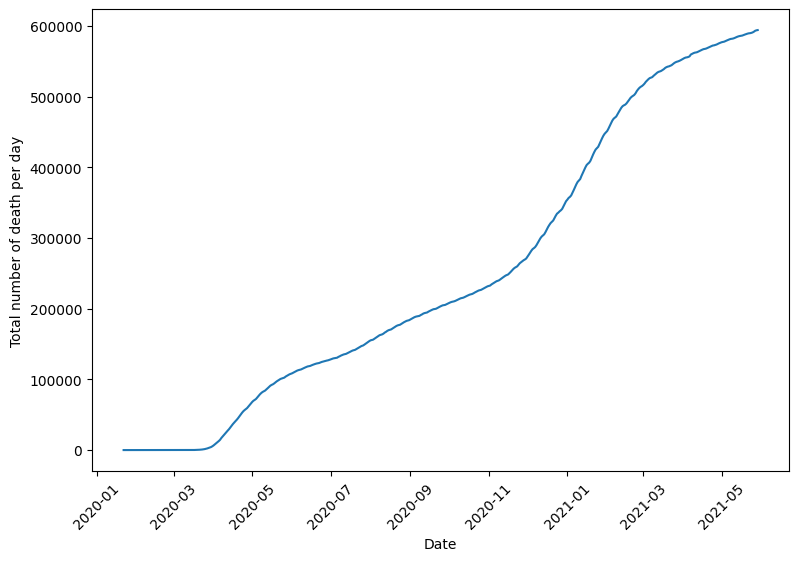

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(US_Data['Death_Date'], US_Data['value'])
plt.xlabel("Date")
plt.ylabel('Total number of death per day')
plt.xticks(rotation=45)
plt.show()

Q2.2: Generate plots of confirmed cases over time for the top countries.

confirmed cases over time calculated for top countries

In [ ]:
top_country_confirm_cases = long_form_confirmed.groupby('Country/Region')['value'].sum().reset_index().sort_values(by='value', ascending=False).head()

In [ ]:
top_country_confirm_cases

Country/Region       value
179             US  6047736004
79           India  3226953590
23          Brazil  2653620509
143         Russia   930548859
62          France   855026731

In [ ]:
top_country_data = long_form_confirmed[long_form_confirmed['Country/Region'].isin(top_country_confirm_cases['Country/Region'])]

The specified period was the peak of the COVID-19 pandemic, during which every country experienced a surge in confirmed cases

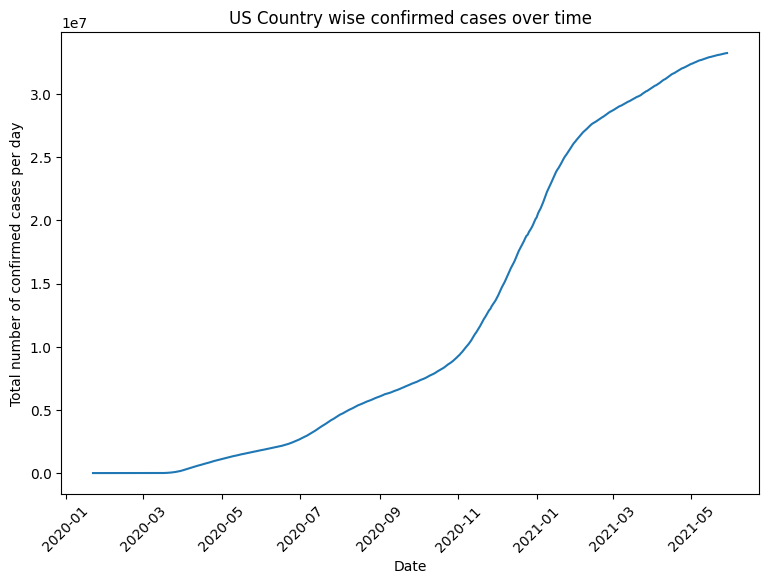

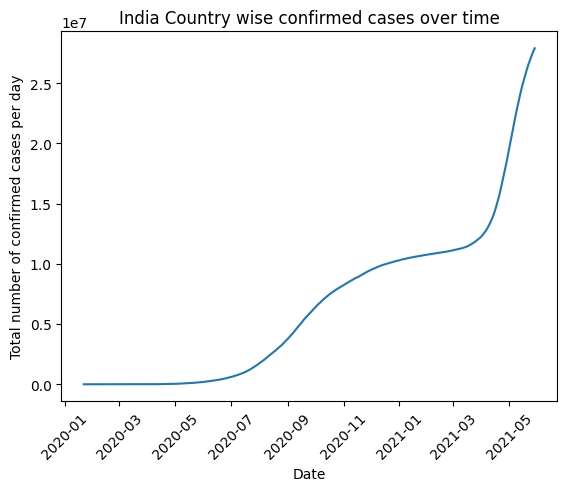

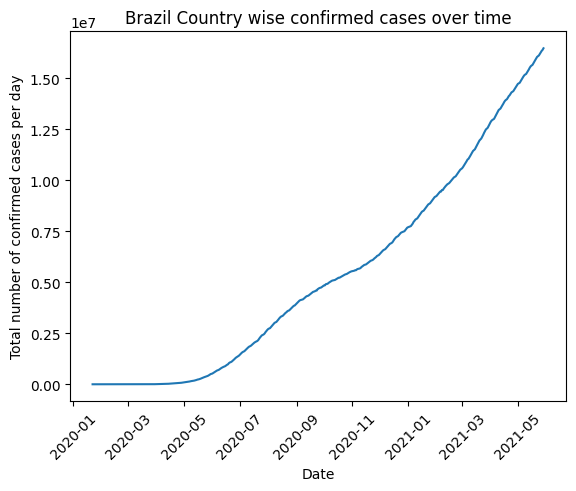

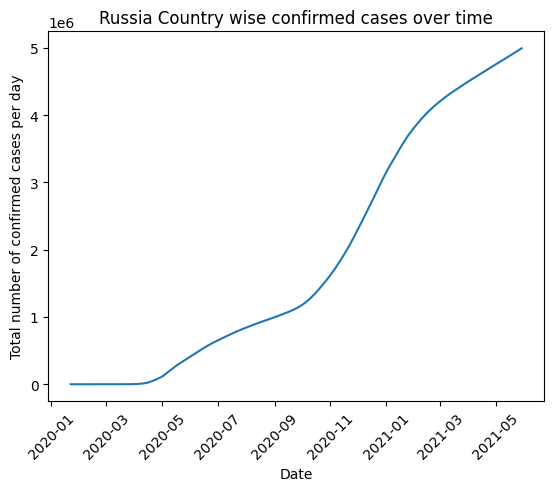

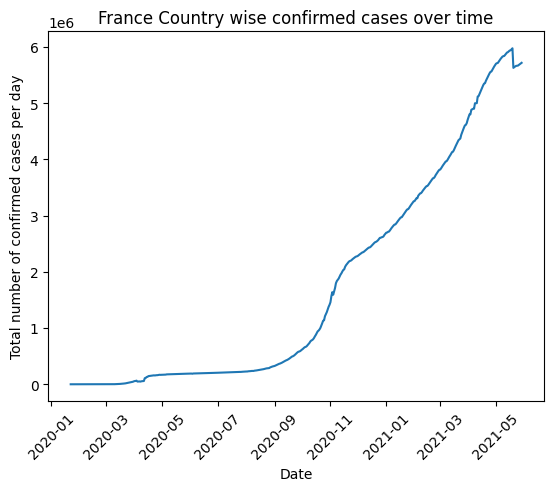

In [ ]:
plt.figure(figsize=(9,6))
for country in top_country_confirm_cases['Country/Region']:
  country_data = top_country_data[top_country_data['Country/Region']==country]
  country_data_confirm_cases = country_data.groupby('Date_Confirmed')['value'].sum().reset_index()
  plt.plot(country_data_confirm_cases['Date_Confirmed'], country_data_confirm_cases['value'])
  plt.xlabel("Date")
  plt.ylabel('Total number of confirmed cases per day')
  plt.title(f"{country} Country wise confirmed cases over time")
  plt.xticks(rotation=45)
  plt.show()
  print()

Q2.3: Generate plots of confirmed cases over time for China.

In [ ]:
china_confirm_cases = long_form_confirmed[long_form_confirmed['Country/Region']=='China']

In [ ]:
china_final_confirm_cases = china_confirm_cases.groupby('Date_Confirmed')['value'].sum().reset_index()

China experienced a steady rise in cases for a certain period, followed by a sharp increase

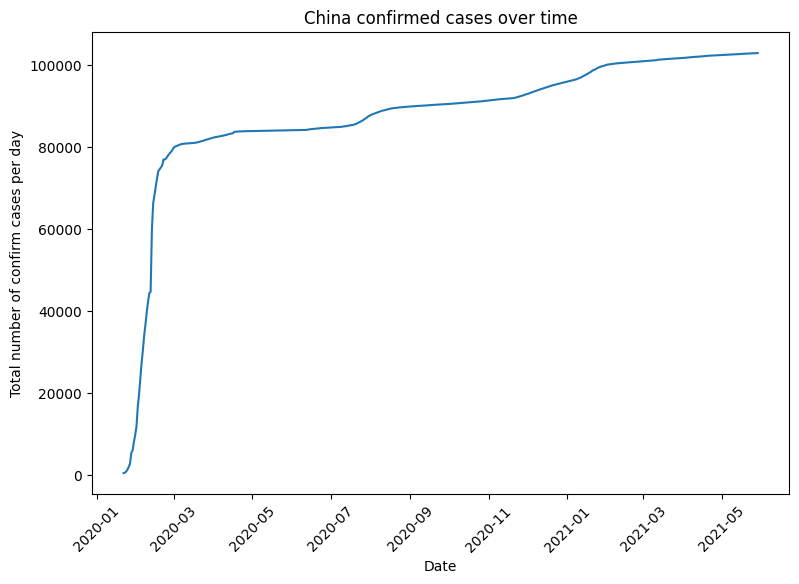

In [ ]:
plt.figure(figsize=(9,6))
plt.plot(china_final_confirm_cases['Date_Confirmed'], china_final_confirm_cases['value'])
plt.xlabel("Date")
plt.ylabel('Total number of confirm cases per day')
plt.title("China confirmed cases over time")
plt.xticks(rotation=45)
plt.show()

**Question 5: Independent Dataset Analysis**

Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

Used the diff() function to compute the day-to-day increase in COVID-19 cases for Germany

diff() - The function is used to calculate the difference between consecutive rows in a column of a DataFrame or Series.

In [ ]:
Daily_cases_Germany_number = long_form_confirmed[long_form_confirmed['Country/Region']=='Germany'].copy()
Daily_cases_Germany_number['Daily_cases_Germany'] = long_form_confirmed[long_form_confirmed['Country/Region']=='Germany'].groupby('Country/Region')['value'].diff().fillna(0)

highest one fetch from germany daily confirm cases

In [ ]:
Daily_cases_Germany_number = Daily_cases_Germany_number.sort_values(by='Daily_cases_Germany', ascending=False)[['Country/Region','Date_Confirmed', 'Daily_cases_Germany']].head(1)

In [ ]:
Daily_cases_Germany_number

Country/Region Date_Confirmed  Daily_cases_Germany
94802        Germany     2020-12-30              49044.0

Used the diff() function to compute the day-to-day increase in COVID-19 cases for France

In [ ]:
Daily_cases_France_number = long_form_confirmed[long_form_confirmed['Country/Region']=='France'].copy()
Daily_cases_France_number['Daily_cases_France'] = long_form_confirmed[long_form_confirmed['Country/Region']=='France'].groupby('Country/Region')['value'].diff().fillna(0)

In [ ]:
Daily_cases_France_number = Daily_cases_France_number.sort_values(by='Daily_cases_France', ascending=False)[['Country/Region','Date_Confirmed', 'Daily_cases_France']].head(1)

In [ ]:
Daily_cases_France_number

Country/Region Date_Confirmed  Daily_cases_France
133438         France     2021-05-19           5862693.0

Used the diff() function to compute the day-to-day increase in COVID-19 cases for Italy

In [ ]:
Daily_cases_Italy_number = long_form_confirmed[long_form_confirmed['Country/Region']=='Italy'].copy()
Daily_cases_Italy_number['Daily_cases_Italy'] = long_form_confirmed[long_form_confirmed['Country/Region']=='Italy'].groupby('Country/Region')['value'].diff().fillna(0)

In [ ]:
Daily_cases_Italy_number = Daily_cases_Italy_number.sort_values(by='Daily_cases_Italy', ascending=False)[['Country/Region','Date_Confirmed', 'Daily_cases_Italy']].head(1)

In [ ]:
Daily_cases_Italy_number

Country/Region Date_Confirmed  Daily_cases_Italy
81849          Italy     2020-11-13            40902.0

Used the diff() function to compute the day-to-day increase in COVID-19 cases for Germany

In [ ]:
country_wise_daily_high_cases = pd.concat([Daily_cases_Germany_number,Daily_cases_France_number,Daily_cases_Italy_number])

In [ ]:
final_data = country_wise_daily_high_cases.melt(id_vars=['Country/Region', 'Date_Confirmed'],var_name='Daily_Cases')

Dropped all nan value and reset the index of dataframe

In [ ]:
final_data = final_data.dropna()
final_data = final_data.reset_index(drop=True)

Highest confirmed cases occurred on France country

In [ ]:
final_data

Country/Region Date_Confirmed          Daily_Cases      value
0        Germany     2020-12-30  Daily_cases_Germany    49044.0
1         France     2021-05-19   Daily_cases_France  5862693.0
2          Italy     2020-11-13    Daily_cases_Italy    40902.0

In [ ]:
final_data.sort_values(by='value', ascending=False).head(1)

Country/Region Date_Confirmed         Daily_Cases      value
1         France     2021-05-19  Daily_cases_France  5862693.0

Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the pandemic according to this metric?

Recovery cases having data up to 2020-12-31 for canada and australia country

In [ ]:
recovered_country = long_form_recovered[long_form_recovered['Country/Region'].isin(['Canada', 'Australia'])]
recovered_country = recovered_country[recovered_country['Recovered_Date']<='2020-12-31']

confirmed_country = long_form_confirmed[long_form_confirmed['Country/Region'].isin(['Canada', 'Australia'])]
confirmed_country = confirmed_country[confirmed_country['Date_Confirmed']<='2020-12-31']

Total recovered cases for canada country

In [ ]:
total_recovered_canada = recovered_country[recovered_country['Country/Region']=='Canada']['value'].sum()

Total recovered cases for australia country

In [ ]:
total_recovered_australia = recovered_country[recovered_country['Country/Region']=='Australia']['value'].sum()

Total confirmed cases for canada country

In [ ]:
total_confirmed_canada = confirmed_country[confirmed_country['Country/Region']=='Canada']['value'].sum()

Total recovered cases for australia country

In [ ]:
total_confirmed_australia = confirmed_country[confirmed_country['Country/Region']=='Australia']['value'].sum()

The recovery rate was calculated as total recovered cases divided by total confirmed cases for each country. Canada had a higher recovery rate compared to Australia

In [ ]:
Rate_of_recovery_canada = (total_recovered_canada/total_confirmed_canada)*100
Rate_of_recovery_canada

np.float64(78.69163715546188)

In [ ]:
Rate_of_recovery_australia = (total_recovered_australia/total_confirmed_australia)*100
Rate_of_recovery_australia

np.float64(74.5312718513269)

Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death rate as of the latest data point.

In [ ]:
province_death = long_form_death[long_form_death['Country/Region']=='Canada'].sort_values(by=['Province/State','Death_Date'])

In [ ]:
province_death = province_death.groupby('Province/State').tail(1).reset_index(drop=True)[['Province/State','Country/Region','value']]

In [ ]:
province_confirm = long_form_confirmed[long_form_confirmed['Country/Region']=='Canada'].sort_values(by=['Province/State','Date_Confirmed'])

In [ ]:
province_confirm = province_confirm.groupby('Province/State').tail(1).reset_index(drop=True)[['Province/State','Country/Region','value']]

In [ ]:
Total_province = province_death.merge(province_confirm, on='Province/State', suffixes=('_death', '_confirm'))

In [ ]:
Total_province['death_rate']=(Total_province['value_death']/Total_province['value_confirm'])*100

Highest death rate is of **Diamond Princess** Province/State and lowest death rate is **Grand Princess**

In [ ]:
Total_province = Total_province[['Province/State', 'value_death', 'value_confirm', 'death_rate']]
Total_province = Total_province.sort_values(by='death_rate').reset_index(drop=True)
Total_province

Province/State  value_death  value_confirm  death_rate
0              Grand Princess            0             13    0.000000
1       Northwest Territories            0            127    0.000000
2      Repatriated Travellers            0             13    0.000000
3        Prince Edward Island            0            200    0.000000
4   Newfoundland and Labrador            6           1302    0.460829
5                     Nunavut            4            648    0.617284
6                     Alberta         2214         226855    0.975954
7                Saskatchewan          537          46464    1.155733
8            British Columbia         1692         143581    1.178429
9                 Nova Scotia           84           5530    1.518987
10                    Ontario         8698         537138    1.619323
11              New Brunswick           43           2191    1.962574
12                   Manitoba         1045          50499    2.069348
13                      Yukon            2             84    2.380952
14                     Quebec        11125         369728    3.008969
15           Diamond Princess            1              0         inf

**Question 7: Data Merging**

Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a comprehensive view of the pandemic's impact?

In [ ]:
two_dataset_merge =  long_form_confirmed.merge(long_form_death, left_on=['Country/Region','Date_Confirmed'], right_on=['Country/Region','Death_Date'], how='inner', suffixes=('_confirmed','_death'))

In [ ]:
Final_total_merge_data = two_dataset_merge.merge(long_form_recovered, left_on=['Country/Region', 'Death_Date'], right_on=['Country/Region','Recovered_Date'])

All the three dataset are merged using merge function of dataframe

In [ ]:
Final_total_merge_data.head()

Province/State_confirmed Country/Region  Lat_confirmed  Long_confirmed  \
0            All Provinces    Afghanistan       33.93911       67.709953   
1            All Provinces        Albania       41.15330       20.168300   
2            All Provinces        Algeria       28.03390        1.659600   
3            All Provinces        Andorra       42.50630        1.521800   
4            All Provinces         Angola      -11.20270       17.873900   

  Date_Confirmed  value_confirmed Province/State_death  Lat_death  Long_death  \
0     2020-01-22                0        All Provinces   33.93911   67.709953   
1     2020-01-22                0        All Provinces   41.15330   20.168300   
2     2020-01-22                0        All Provinces   28.03390    1.659600   
3     2020-01-22                0        All Provinces   42.50630    1.521800   
4     2020-01-22                0        All Provinces  -11.20270   17.873900   

  Death_Date  value_death Province/State       Lat       Long Recovered_Date  \
0 2020-01-22            0  All Provinces  33.93911  67.709953     2020-01-22   
1 2020-01-22            0  All Provinces  41.15330  20.168300     2020-01-22   
2 2020-01-22            0  All Provinces  28.03390   1.659600     2020-01-22   
3 2020-01-22            0  All Provinces  42.50630   1.521800     2020-01-22   
4 2020-01-22            0  All Provinces -11.20270  17.873900     2020-01-22   

   value  
0      0  
1      0  
2      0  
3      0  
4      0

Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]

In [ ]:
Final_total_merge_data['Month'] = Final_total_merge_data['Date_Confirmed'].dt.month

In [ ]:
Final_total_merge_data['Year'] = Final_total_merge_data['Date_Confirmed'].dt.year

In [ ]:
analyse_data =  Final_total_merge_data[['Country/Region', 'value_confirmed', 'value_death', 'value', 'Month']]

In [ ]:
analyse_data_confirmed_cases =  analyse_data.groupby(['Country/Region','Month'])['value_confirmed'].sum().reset_index()

Monthly cases are displayed as per the country wise. Ten country's data are displayed at a time on one graph. Mostly found that first quarter has the highest confirmed cases in country

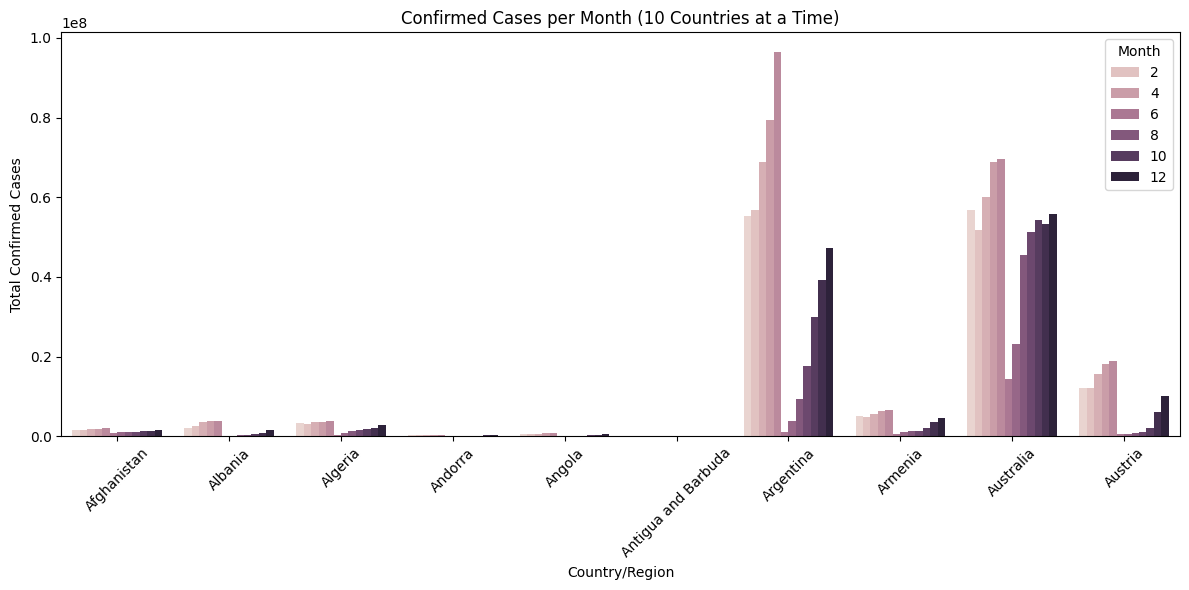

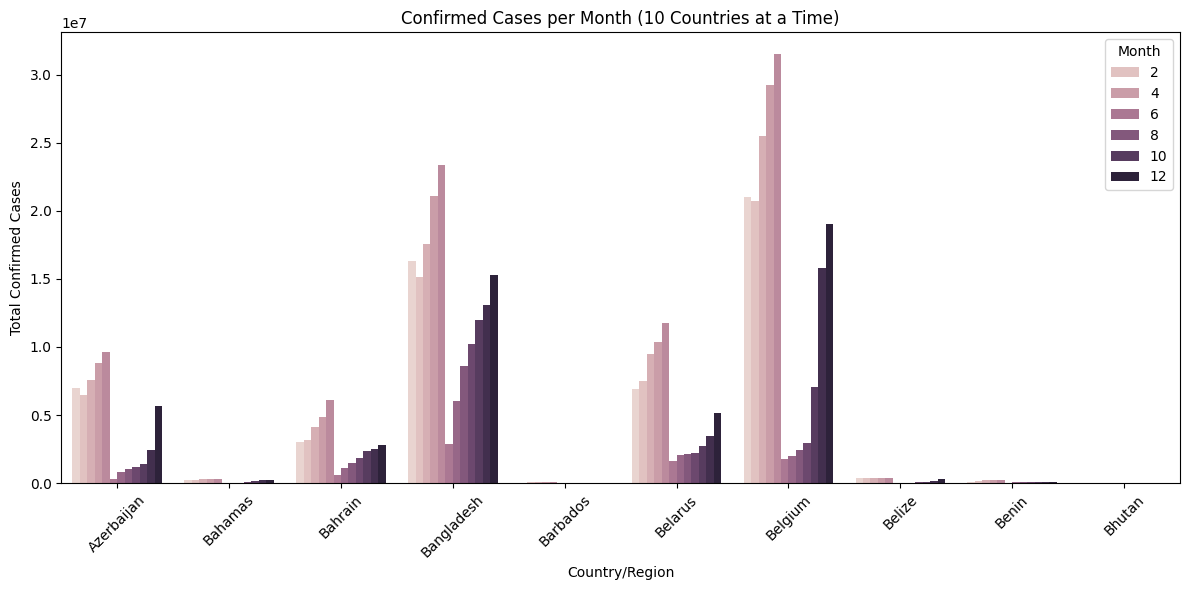

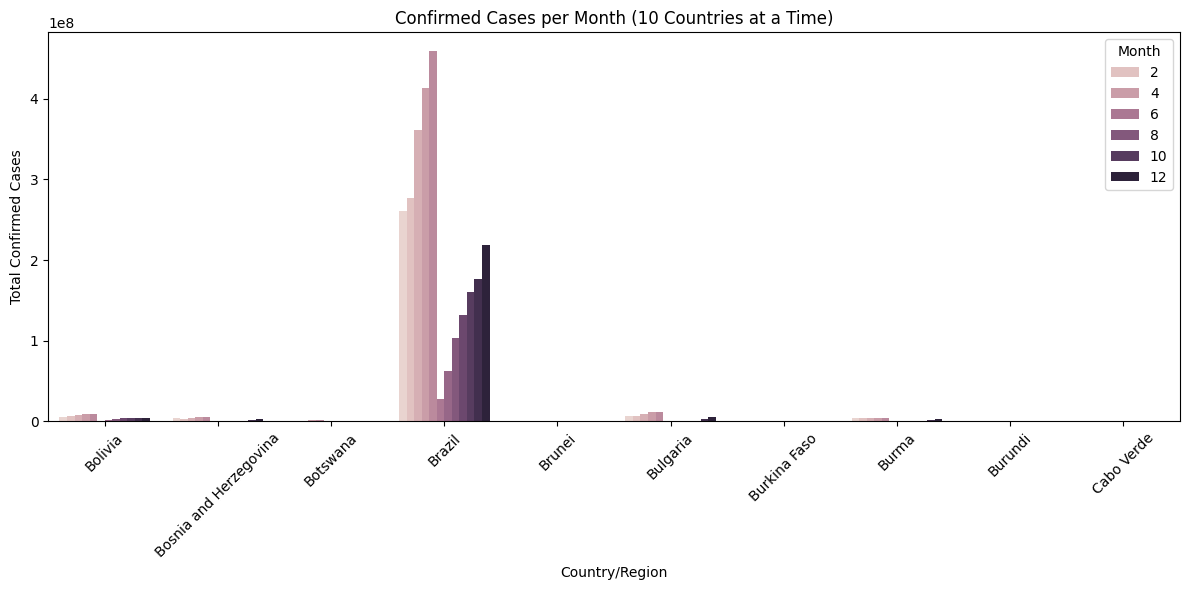

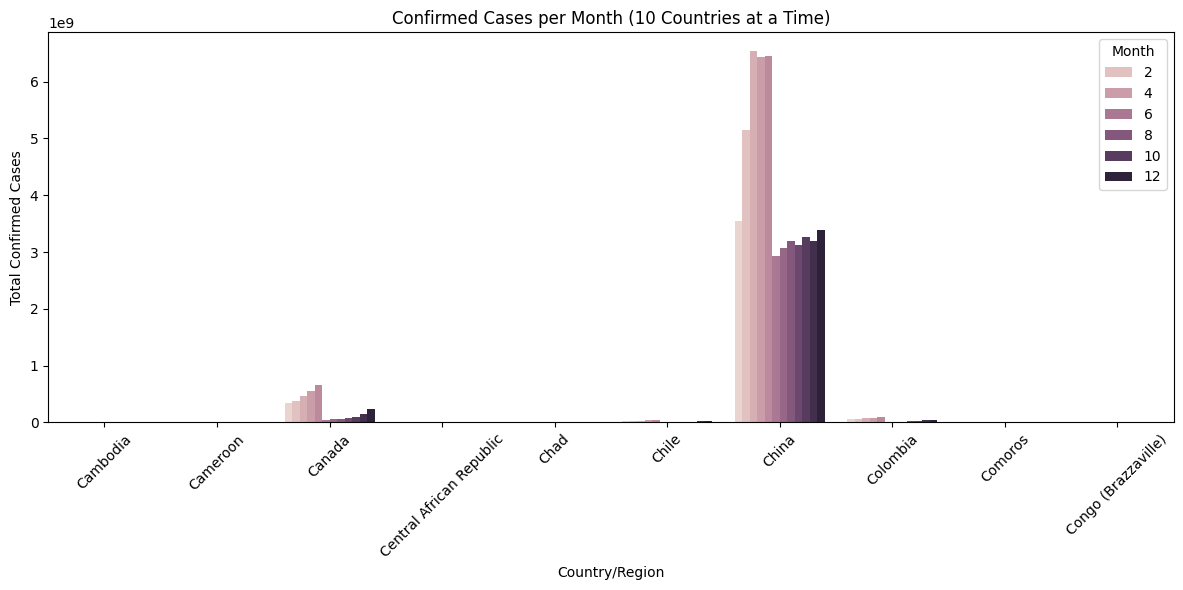

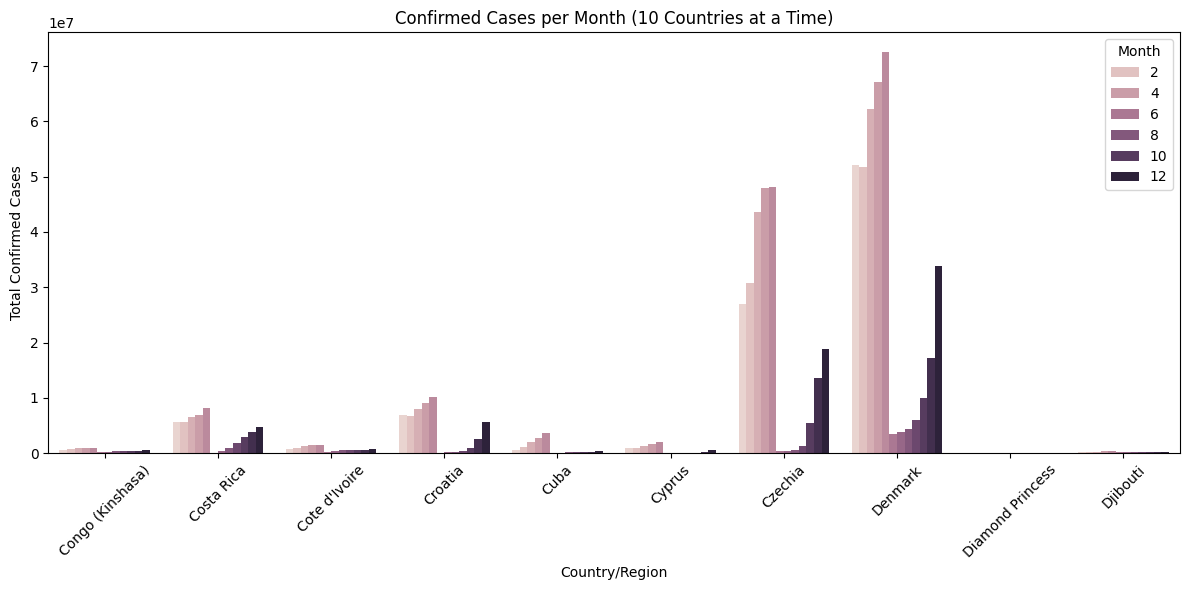

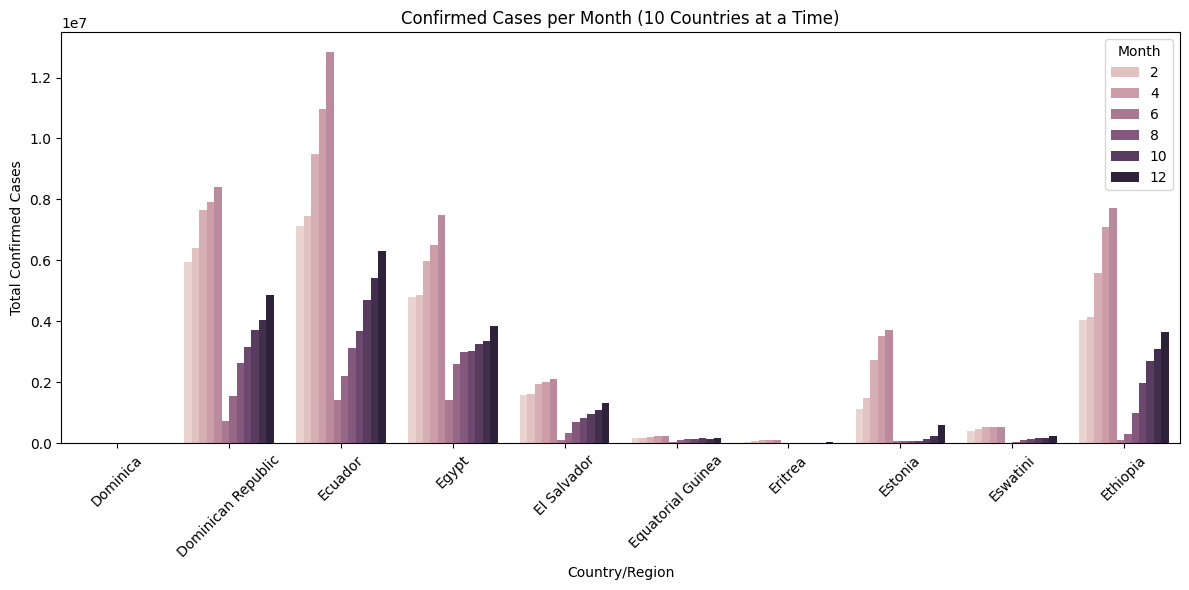

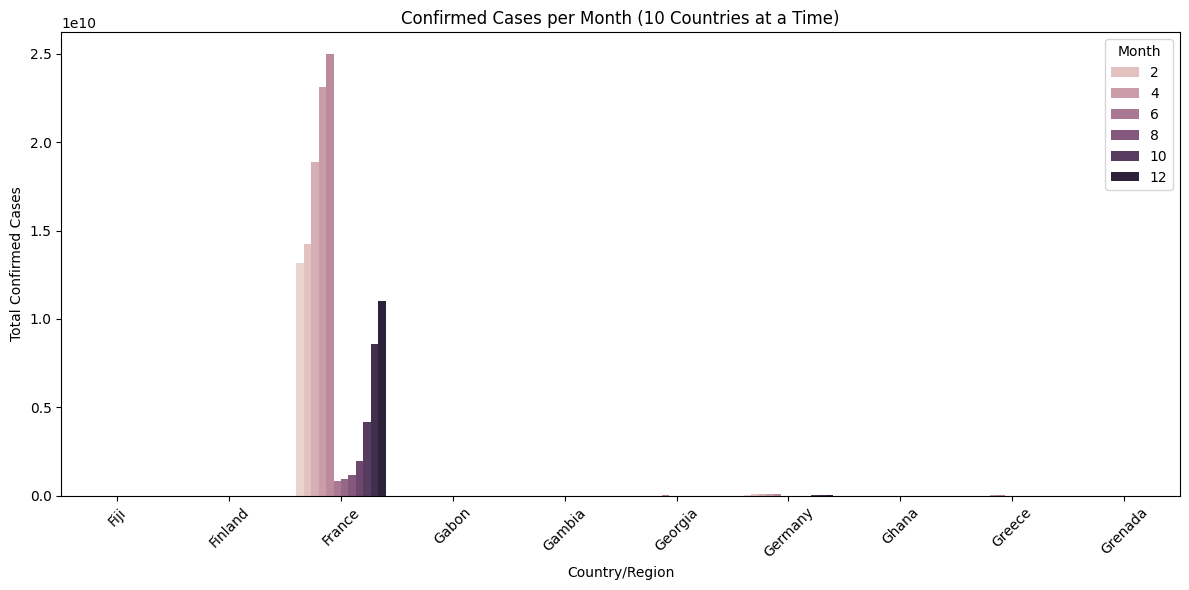

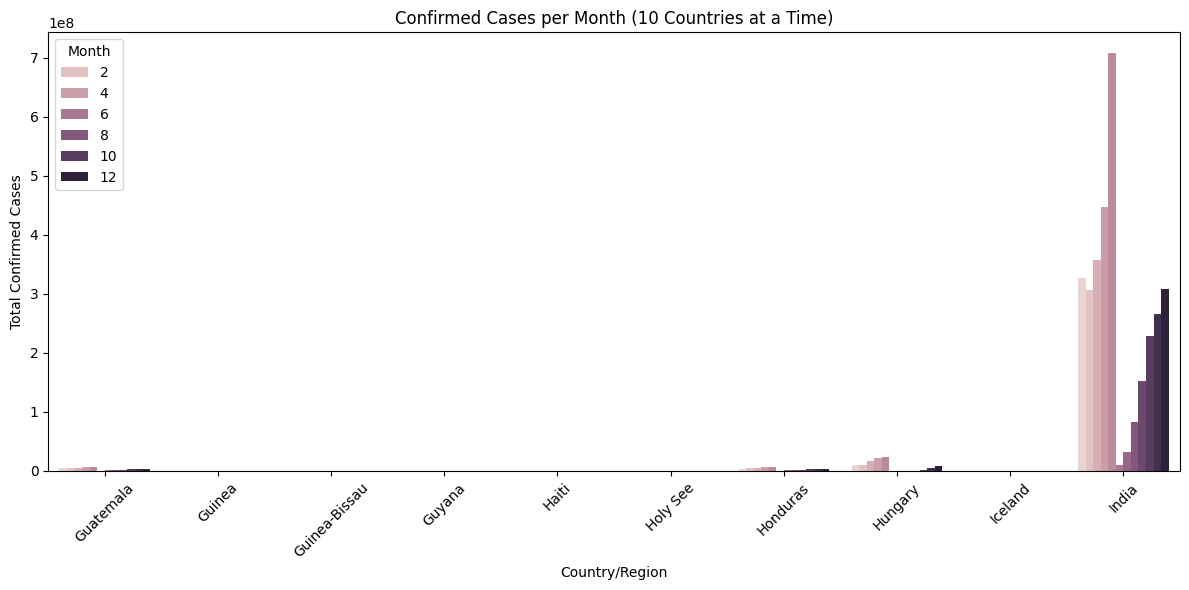

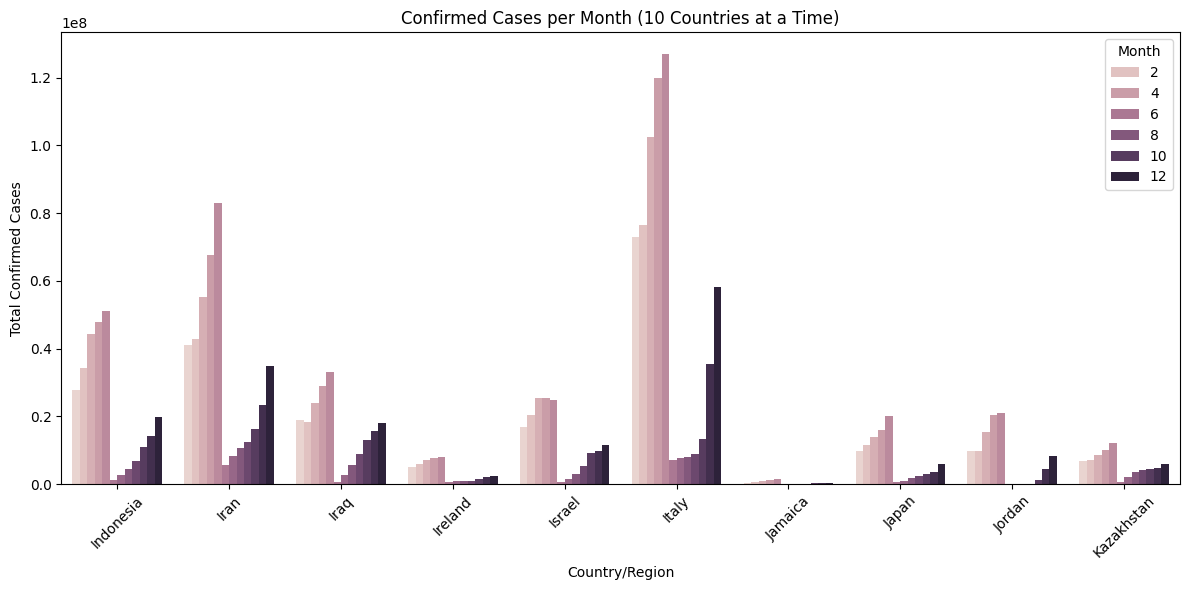

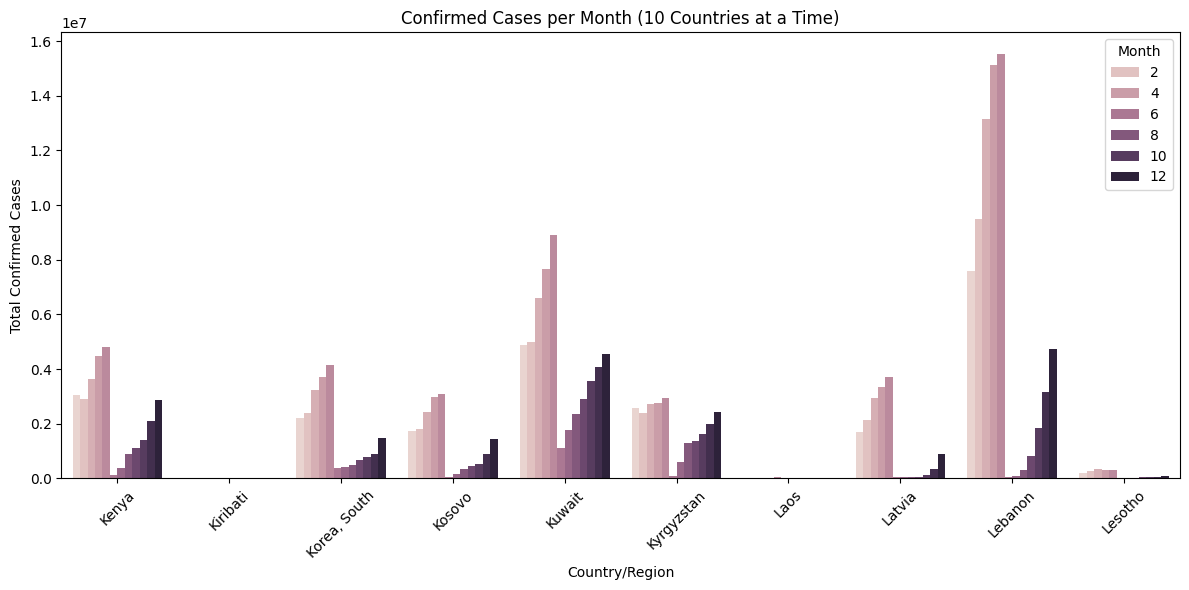

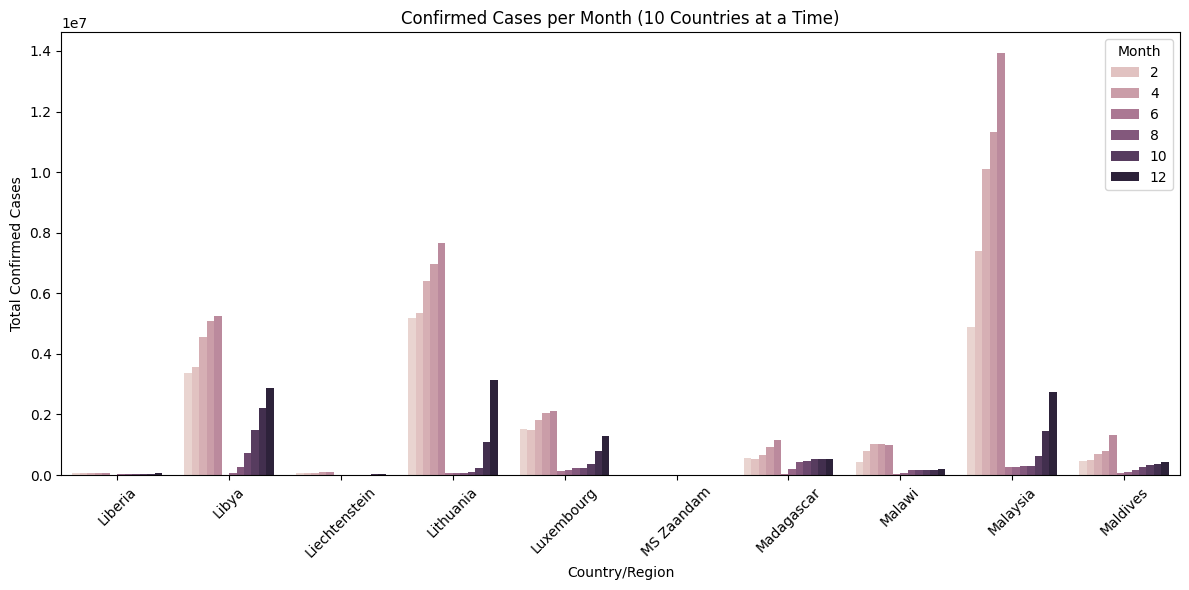

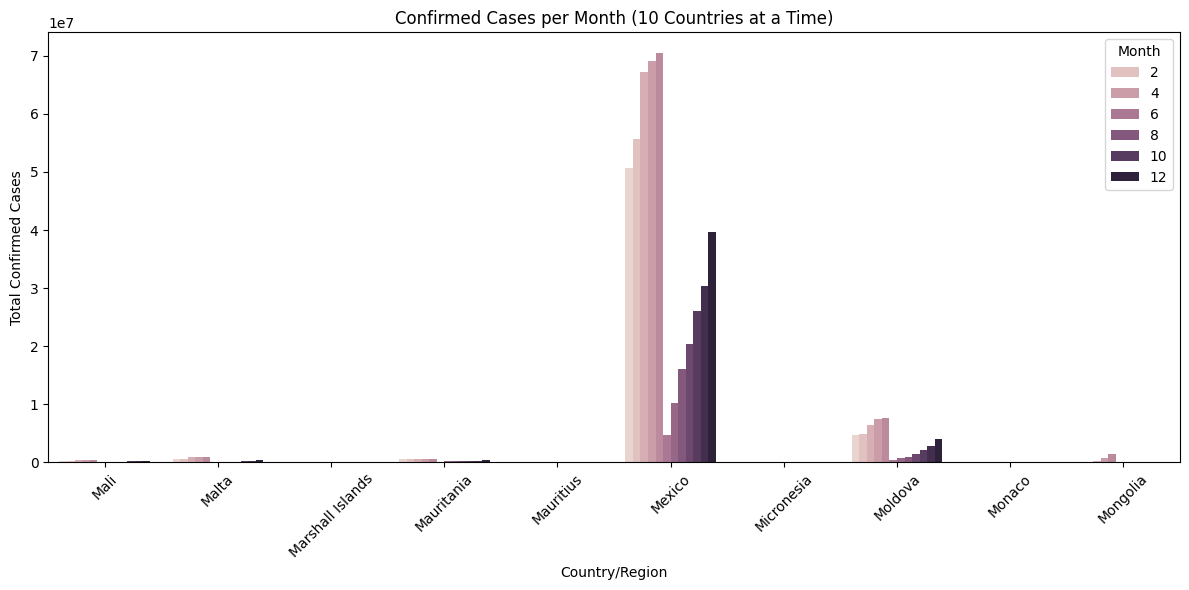

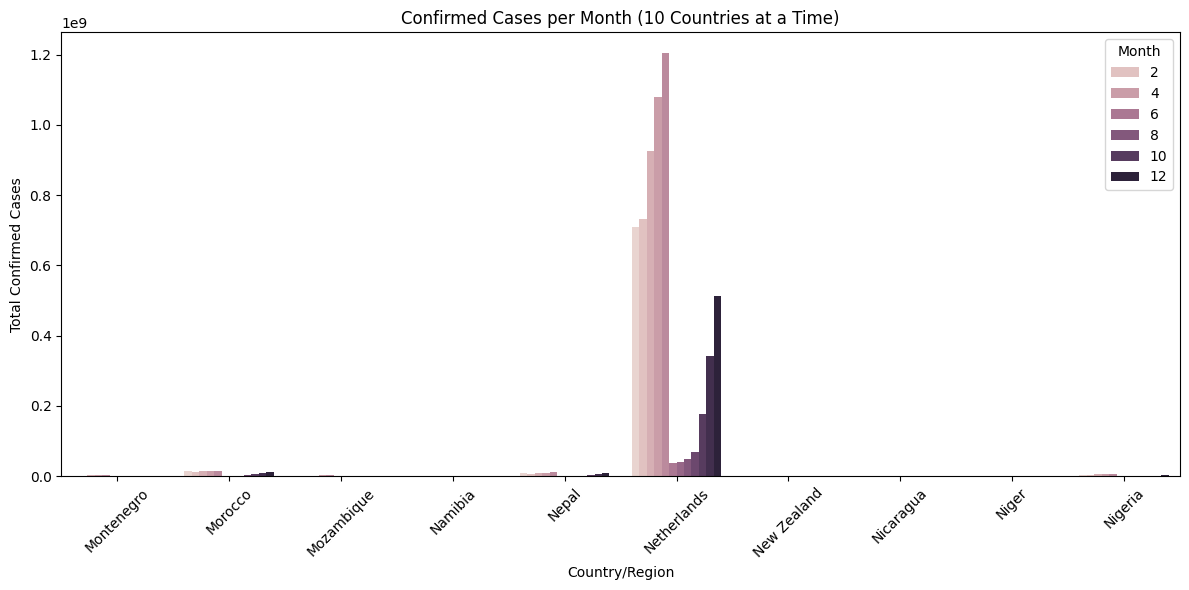

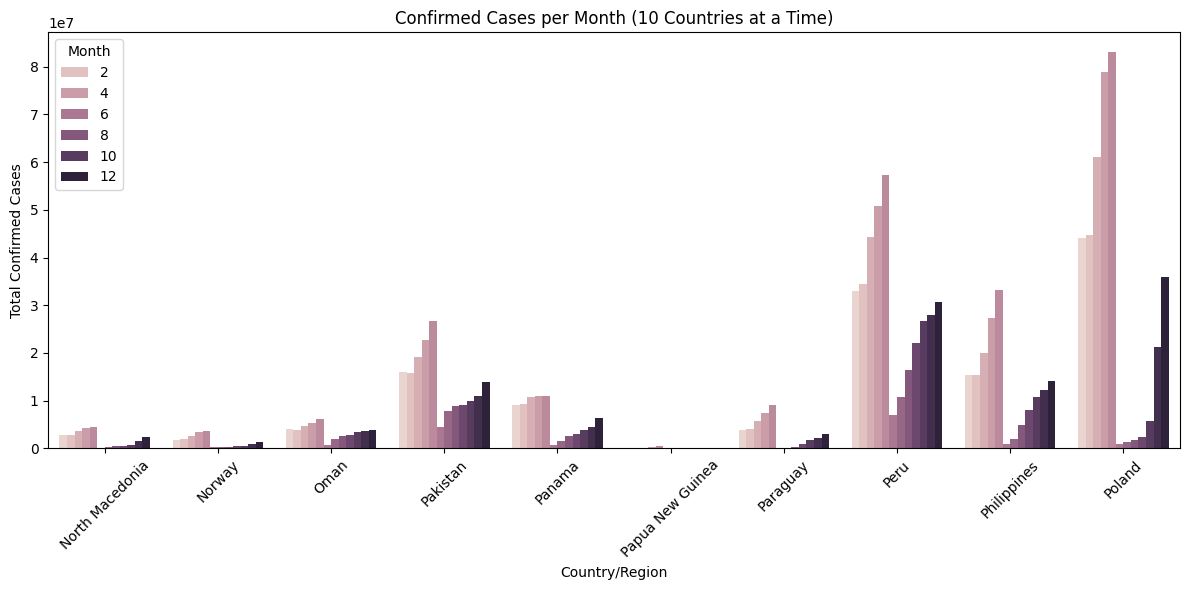

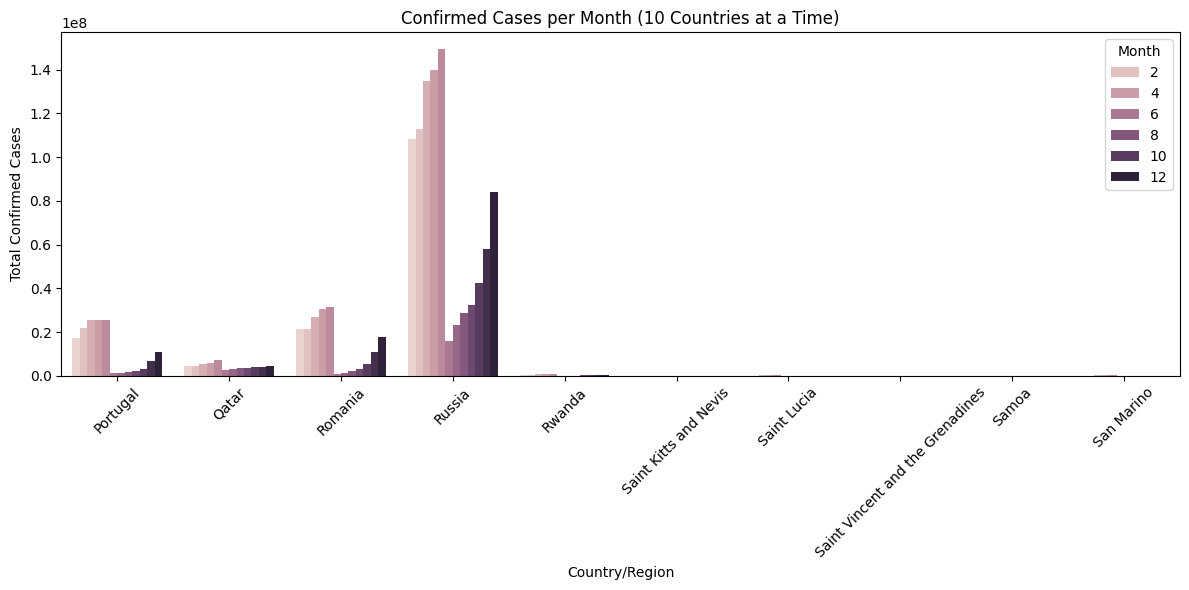

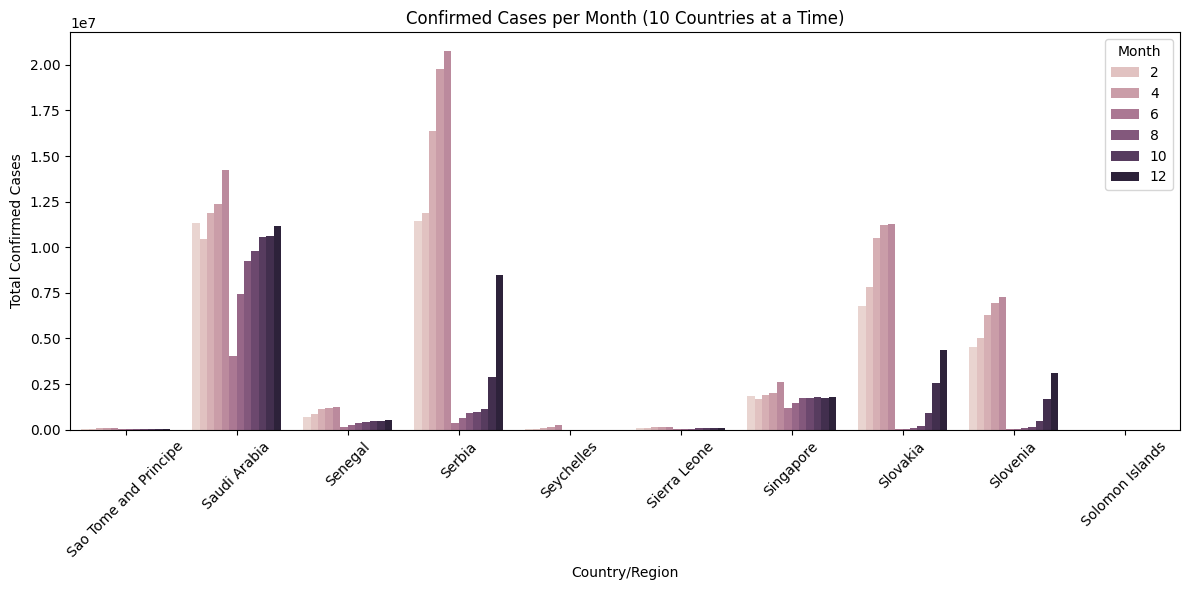

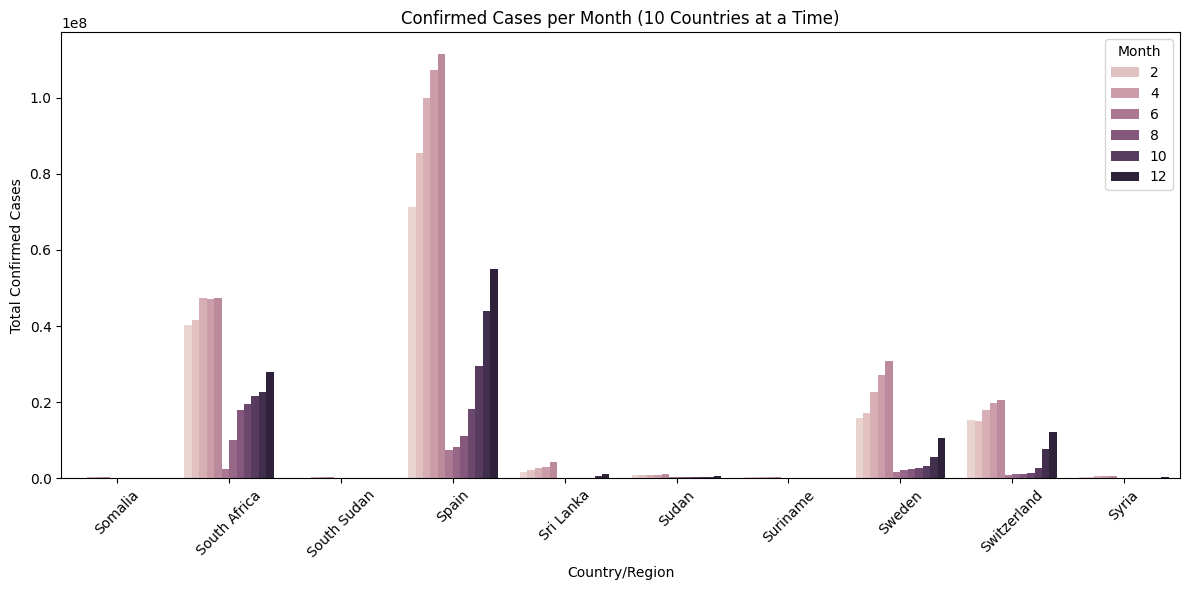

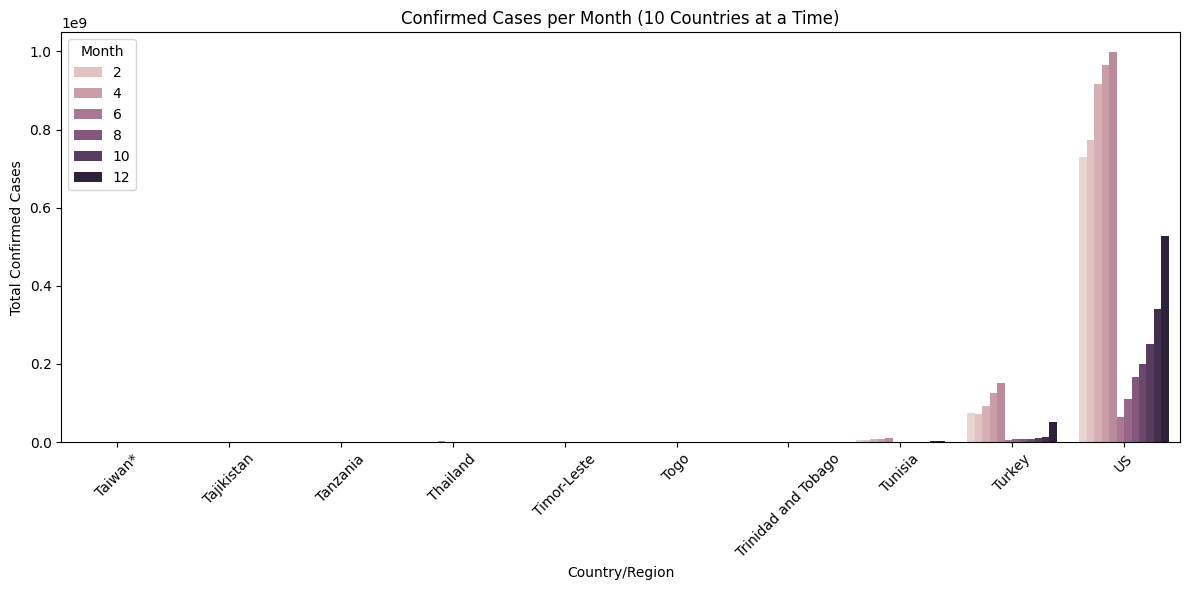

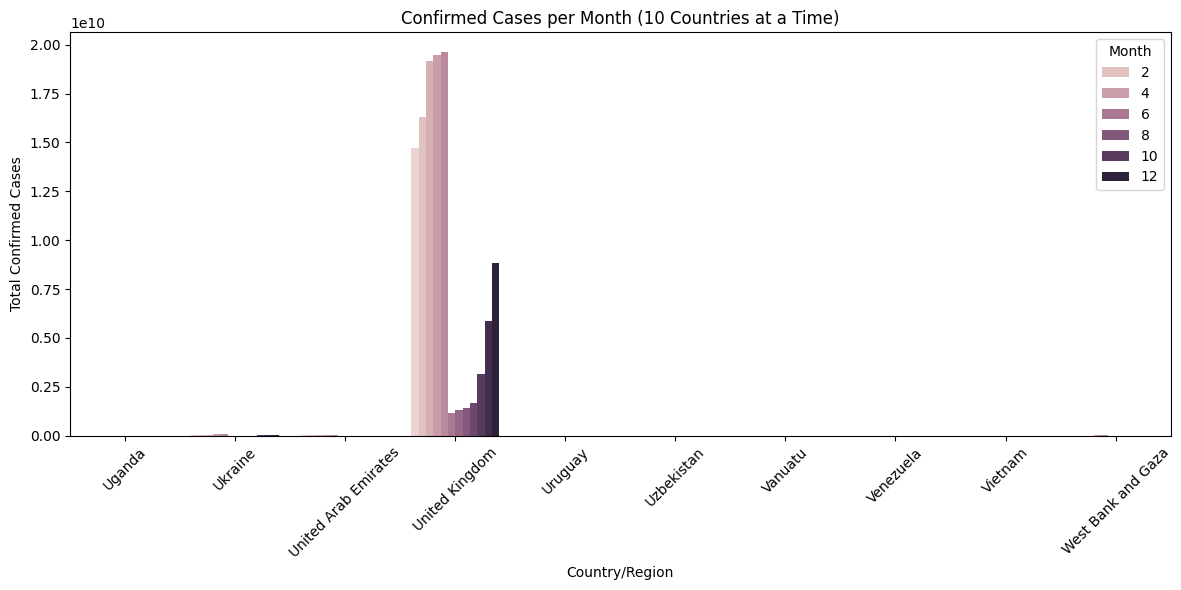

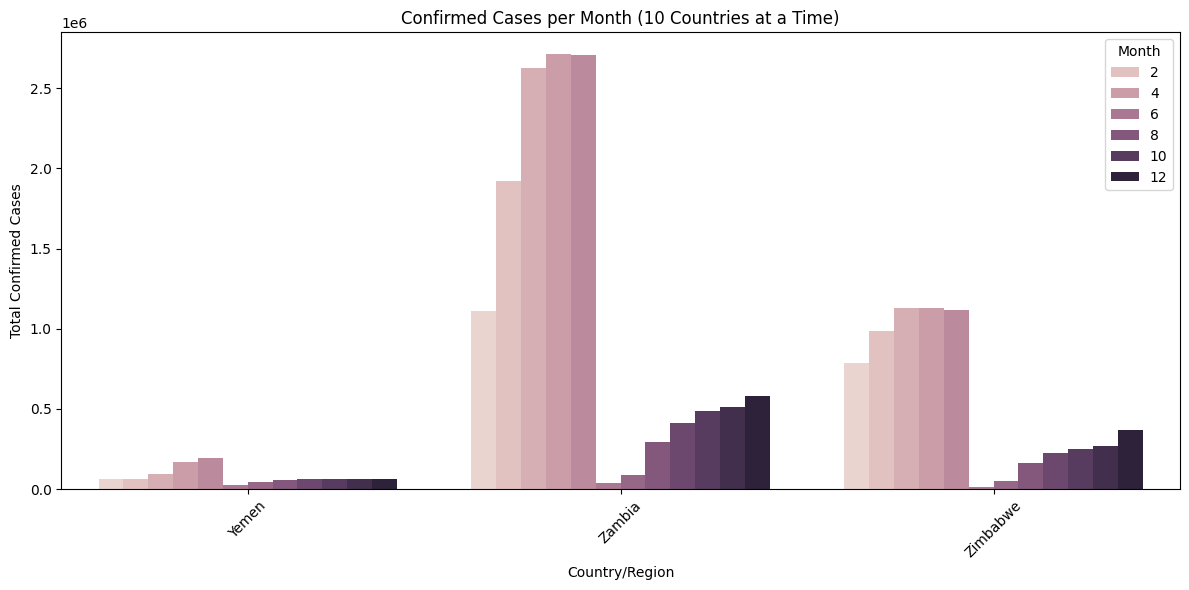

In [ ]:
countries = analyse_data_confirmed_cases['Country/Region'].unique()

for i in range(0, len(countries), 10):
    batch_countries = countries[i:i+10]

    data = analyse_data_confirmed_cases[analyse_data_confirmed_cases['Country/Region'].isin(batch_countries)]

    plt.figure(figsize=(12, 6))
    sn.barplot(data=data,x='Country/Region',y='value_confirmed',hue='Month')

    plt.xlabel("Country/Region")
    plt.ylabel("Total Confirmed Cases")
    plt.title("Confirmed Cases per Month (10 Countries at a Time)")
    plt.xticks(rotation=45)
    plt.legend(title='Month')
    plt.tight_layout()
    plt.show()

In [ ]:
analyse_data_death_cases =  analyse_data.groupby(['Country/Region','Month'])['value_death'].sum().reset_index()

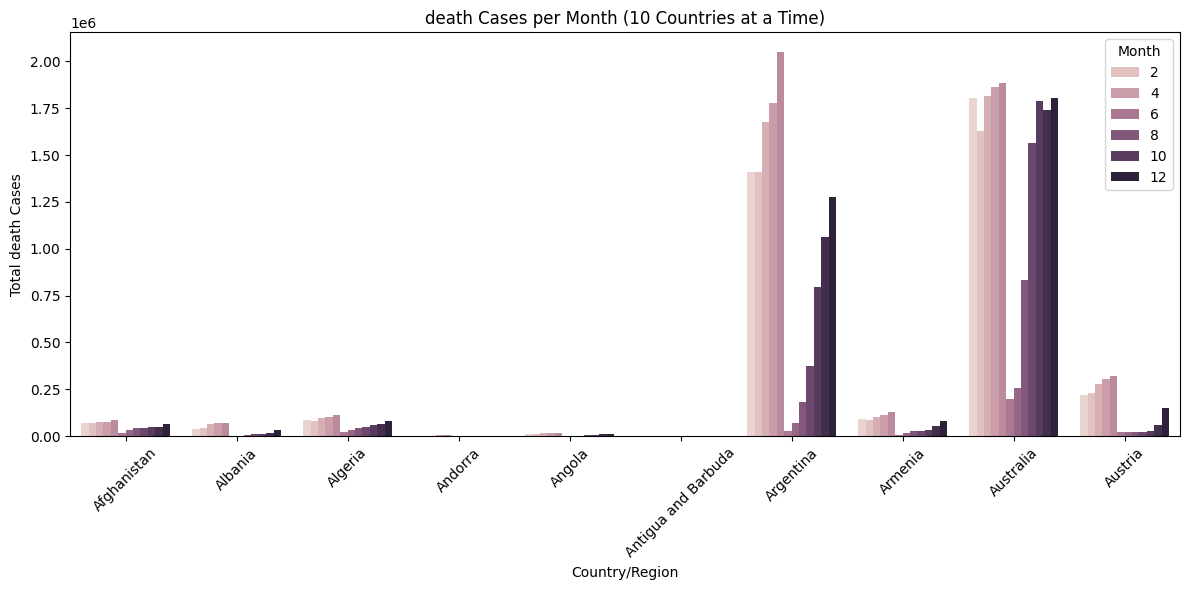

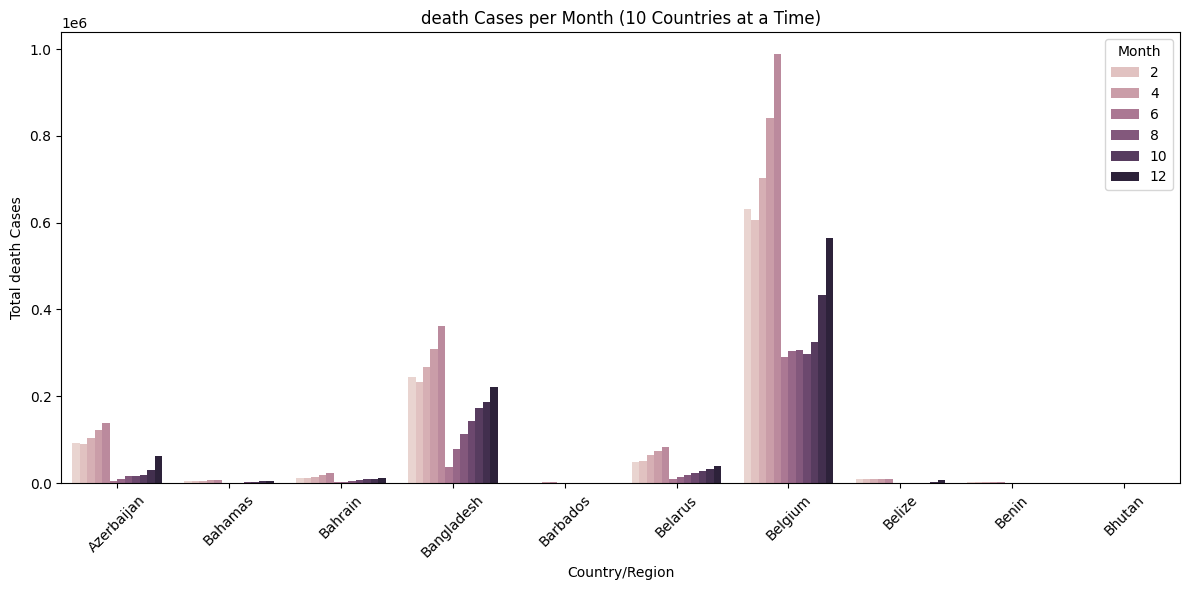

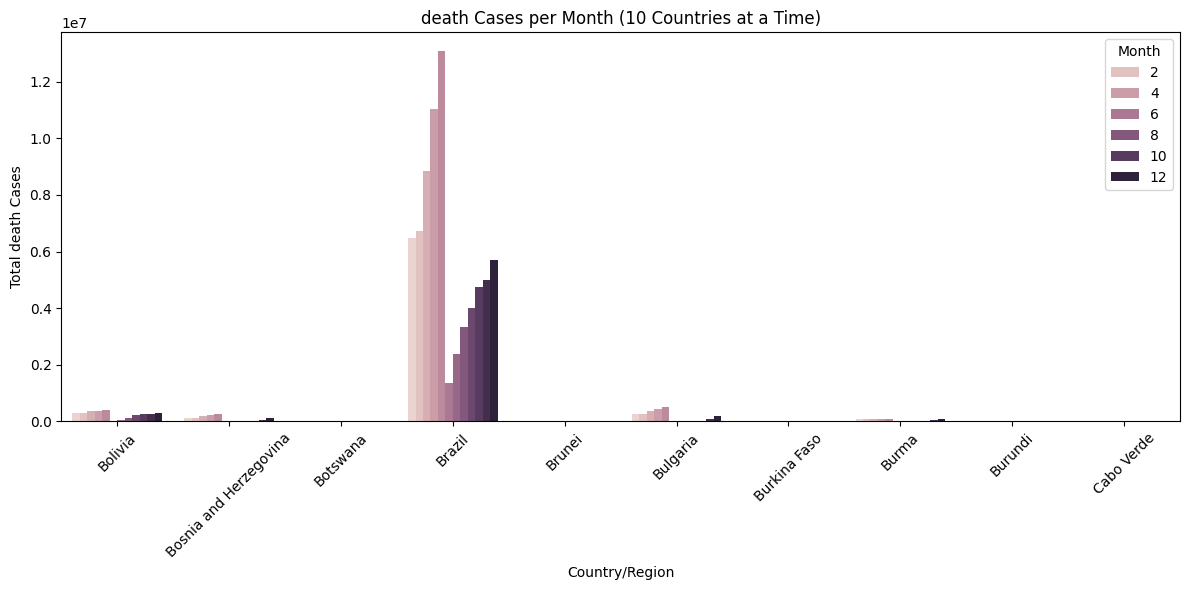

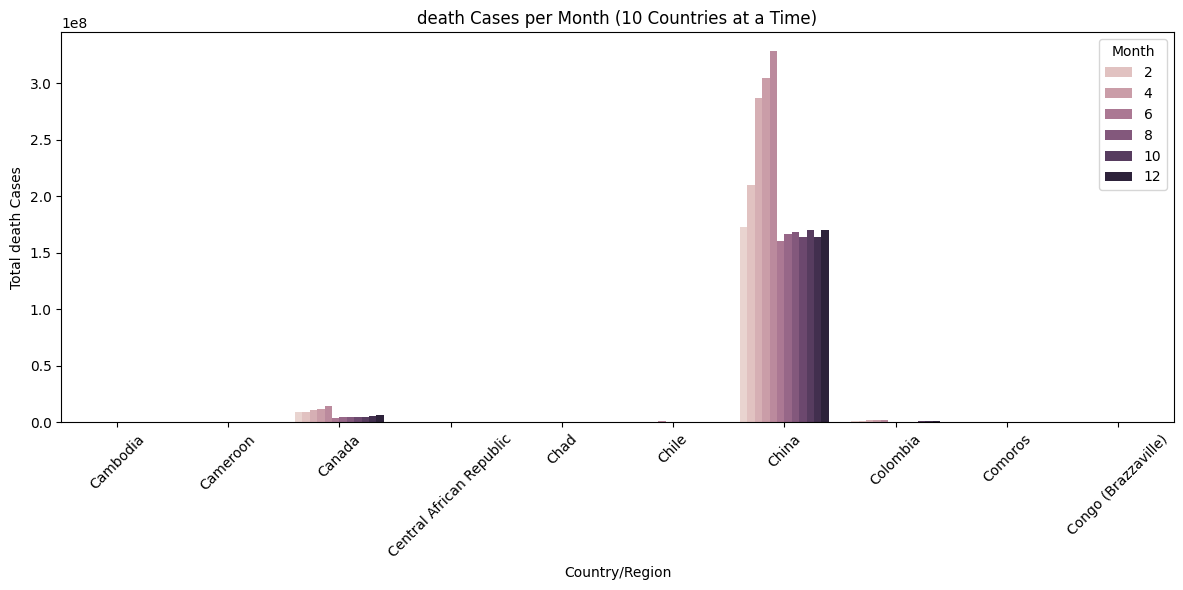

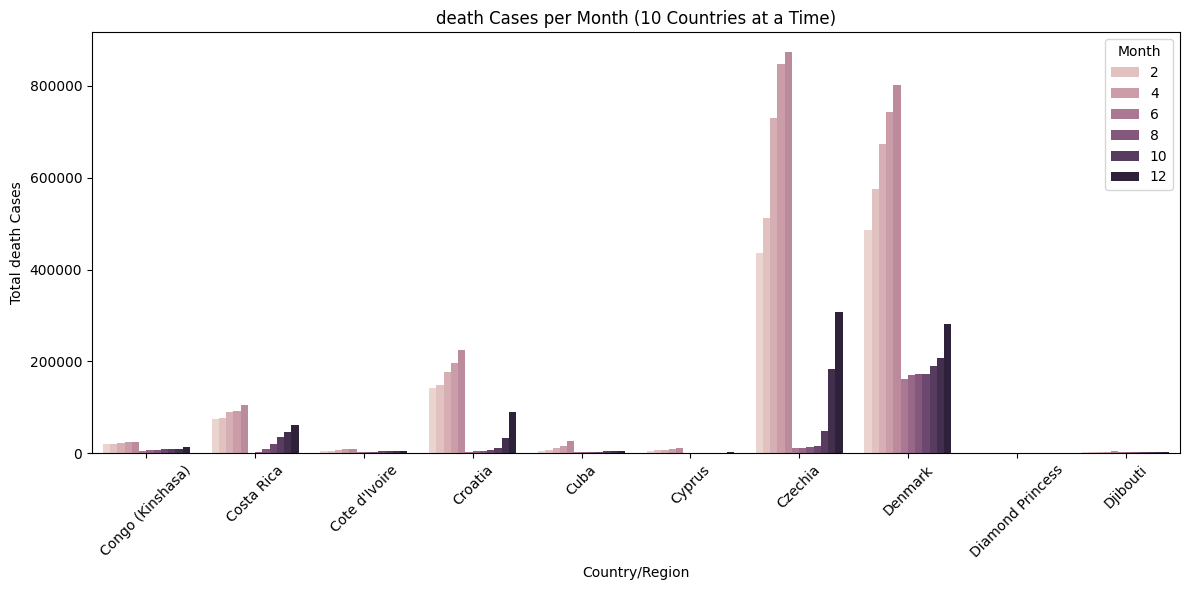

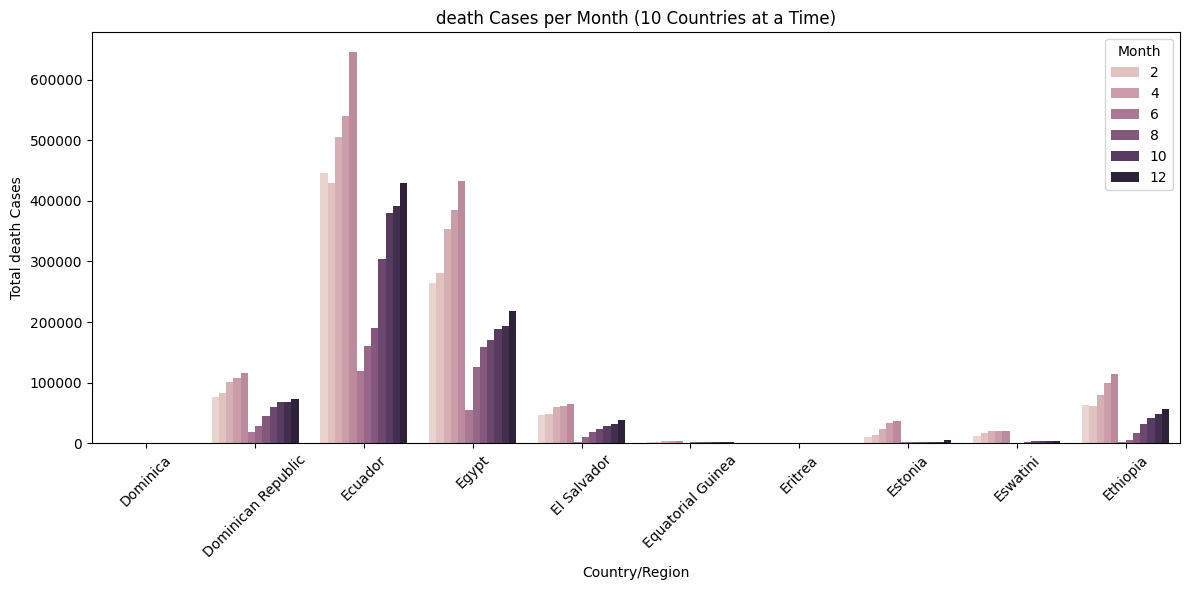

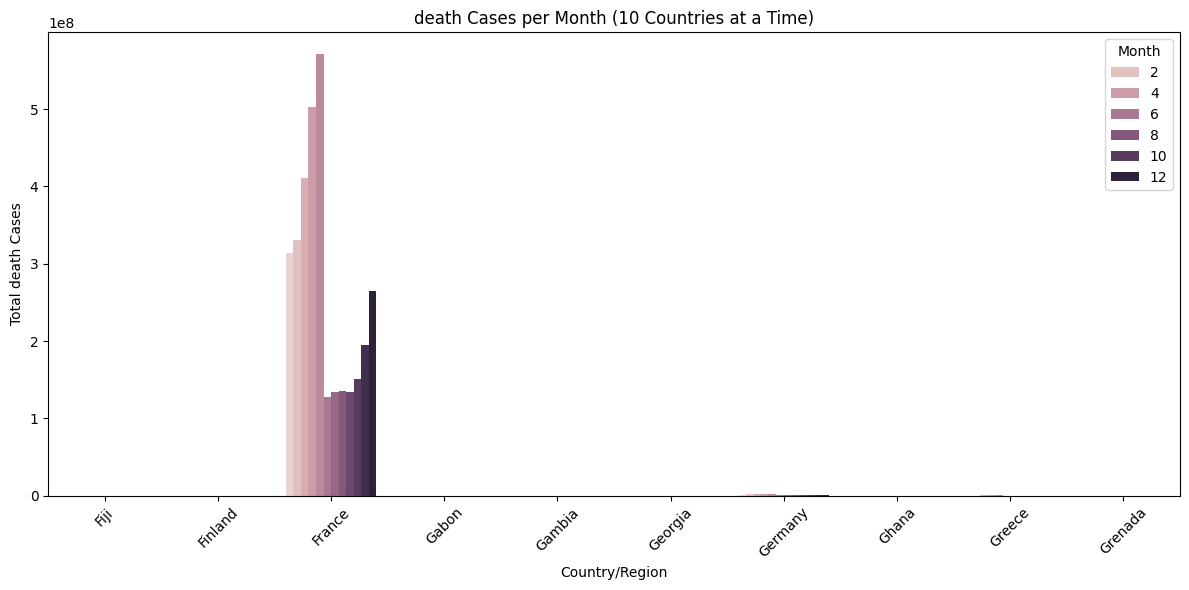

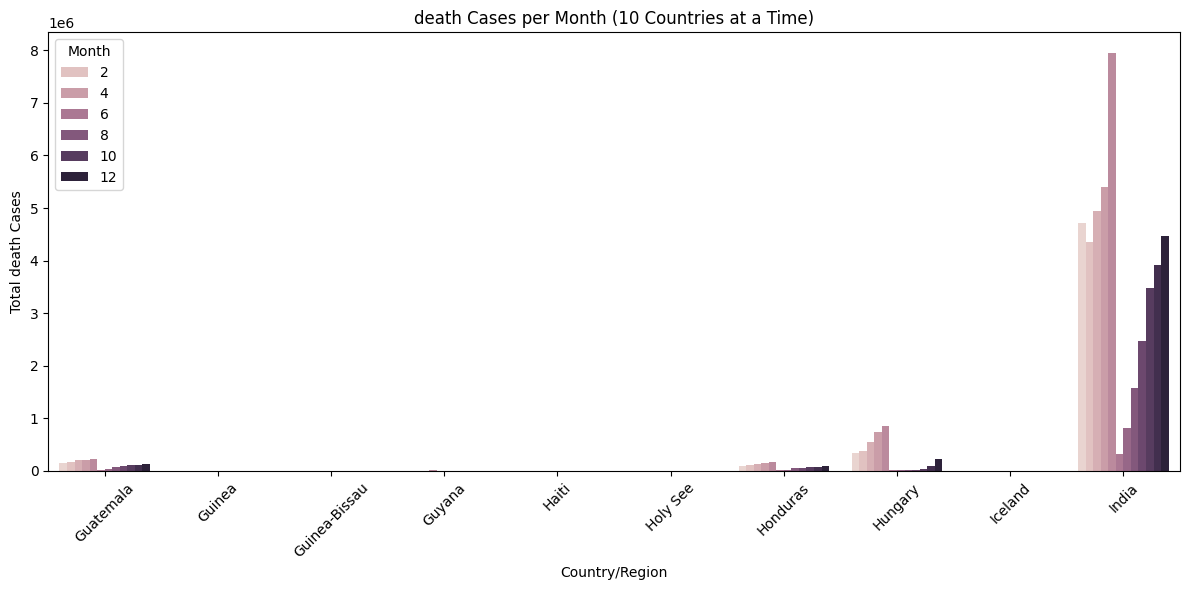

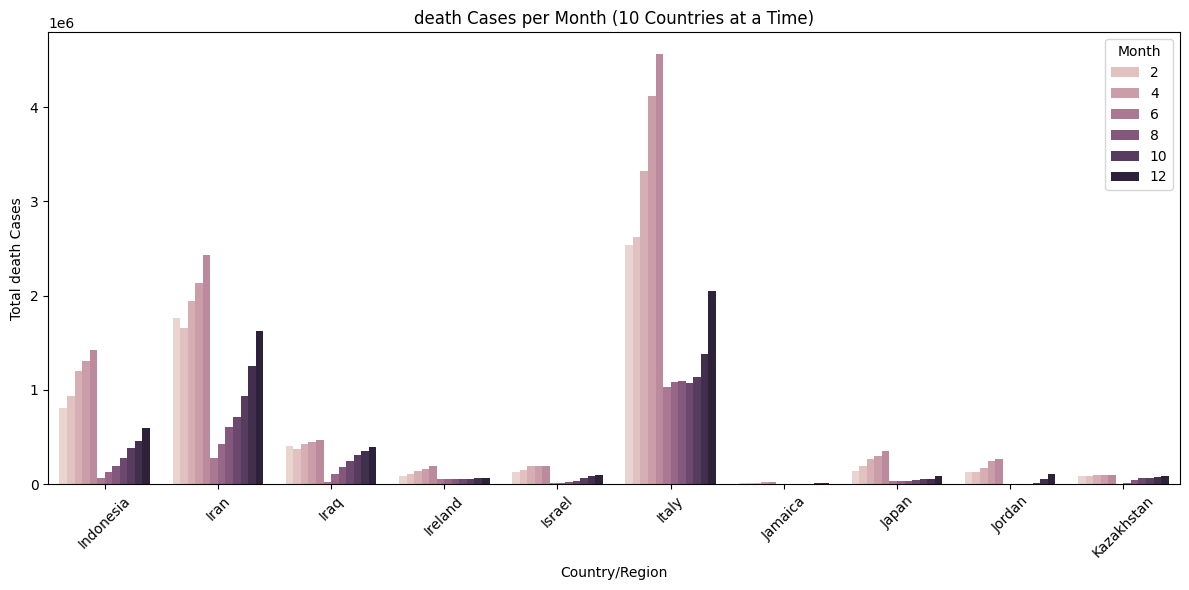

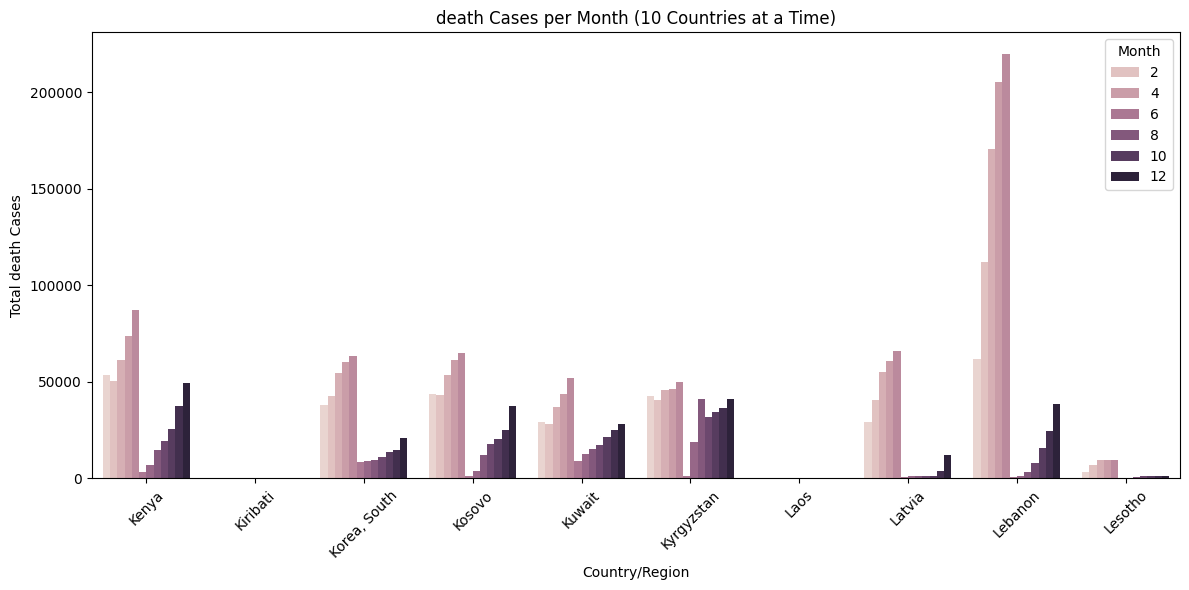

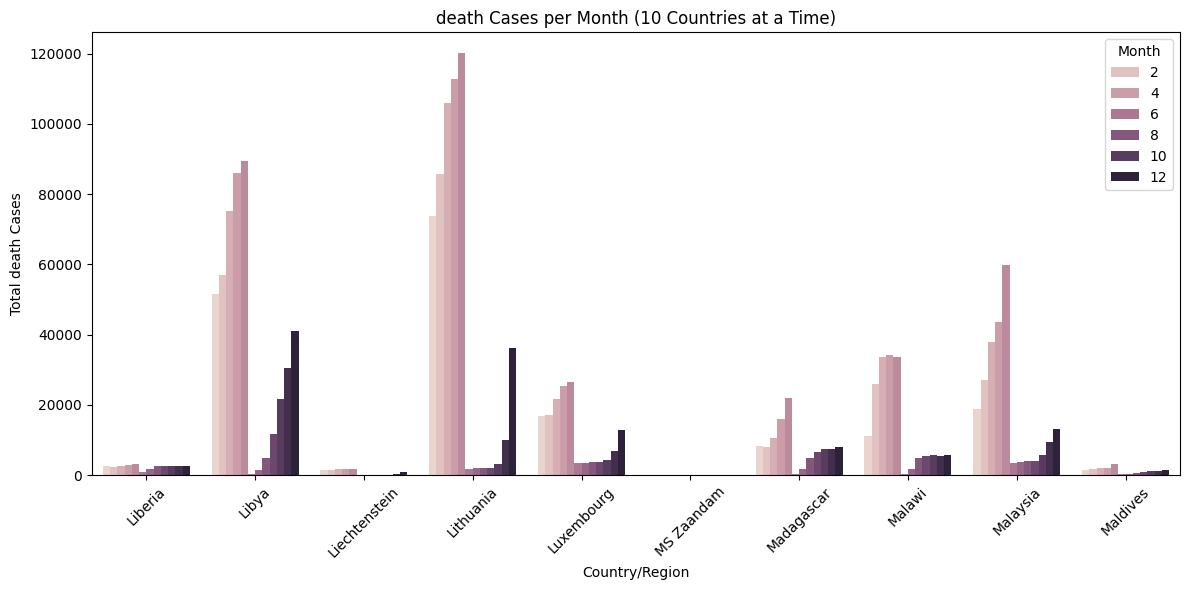

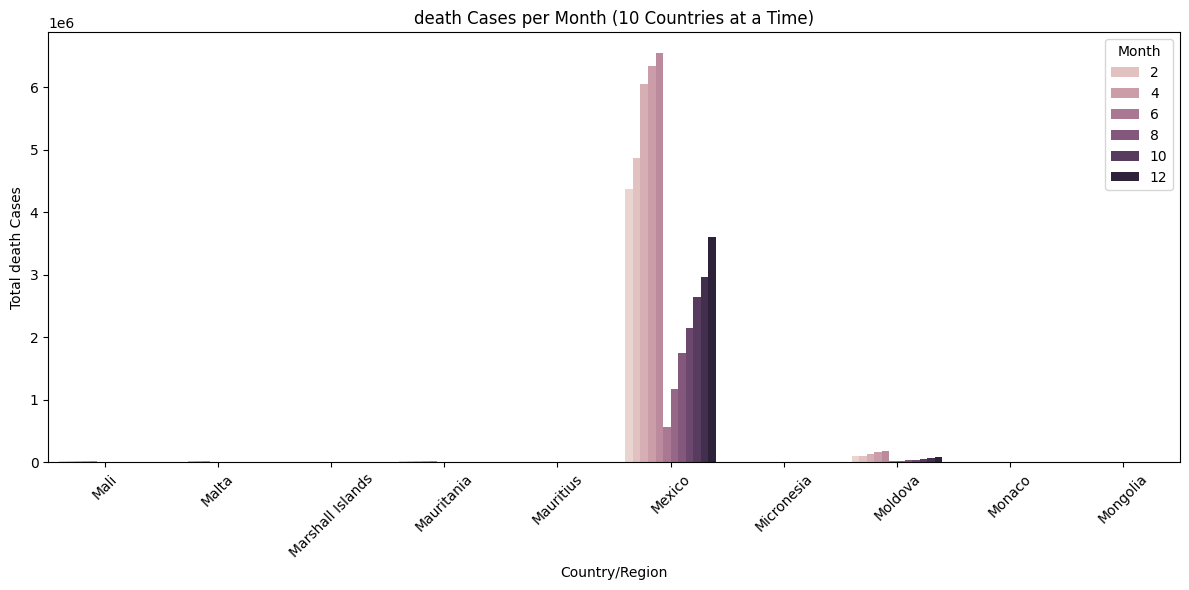

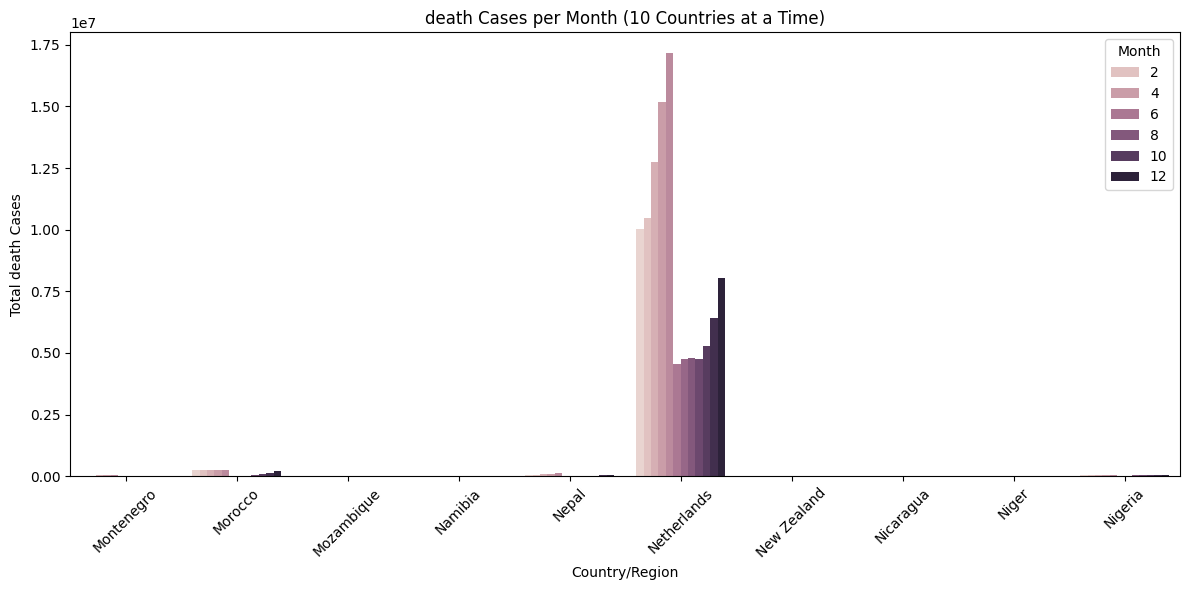

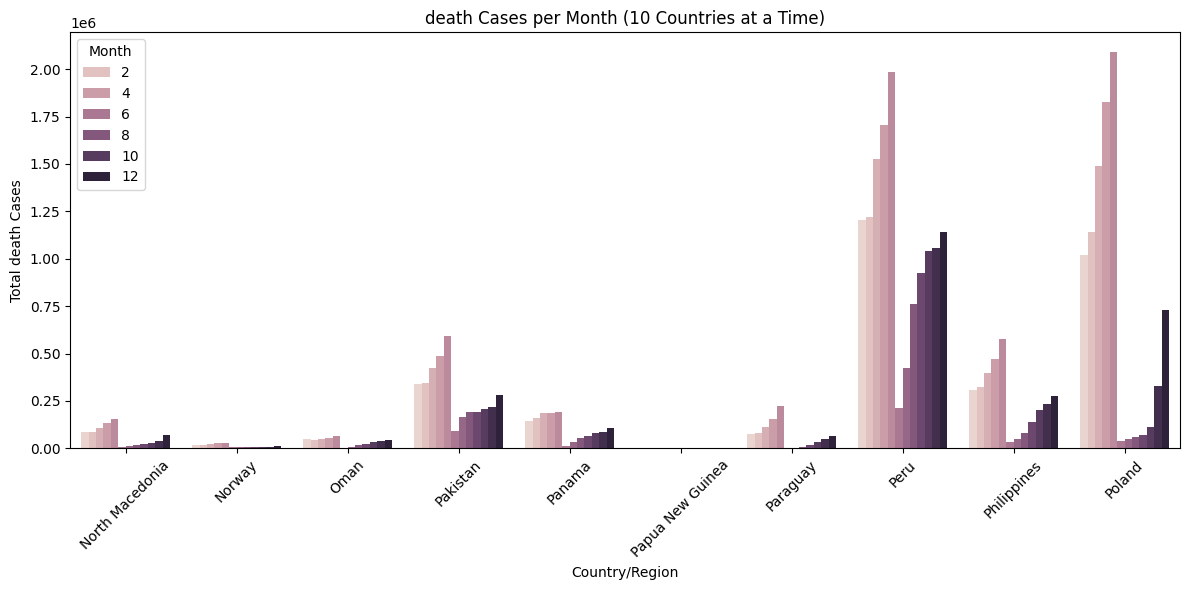

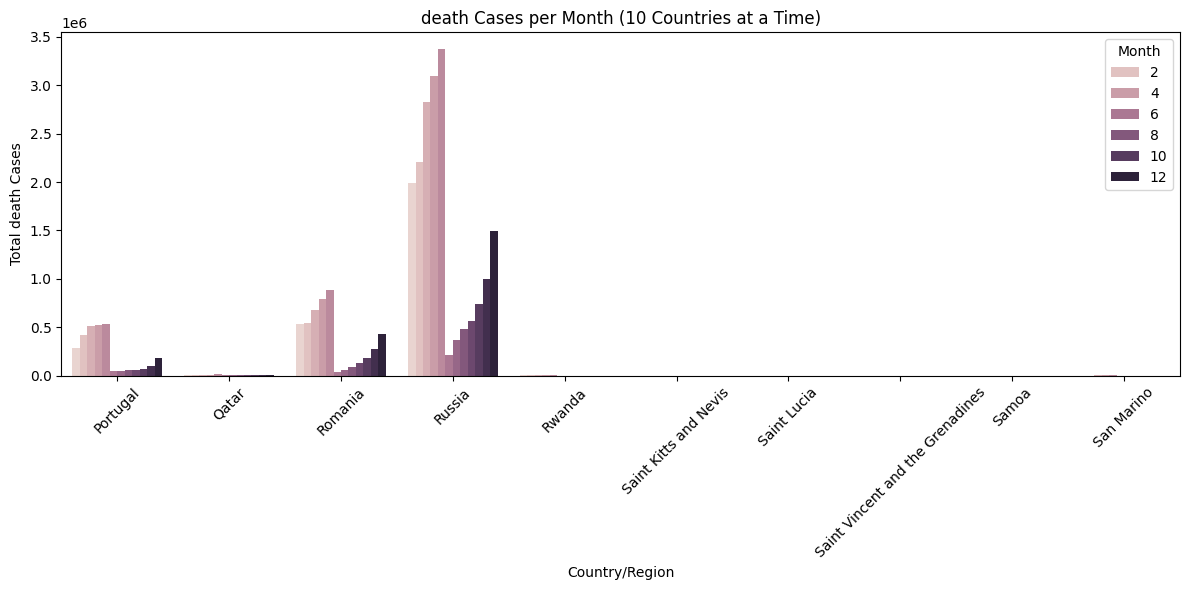

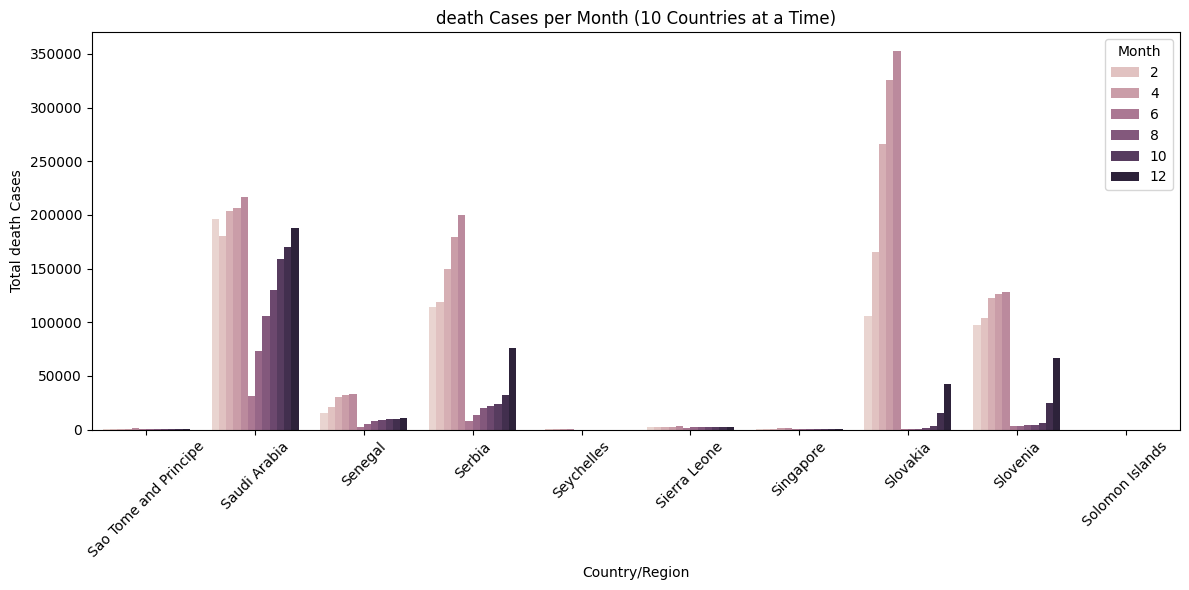

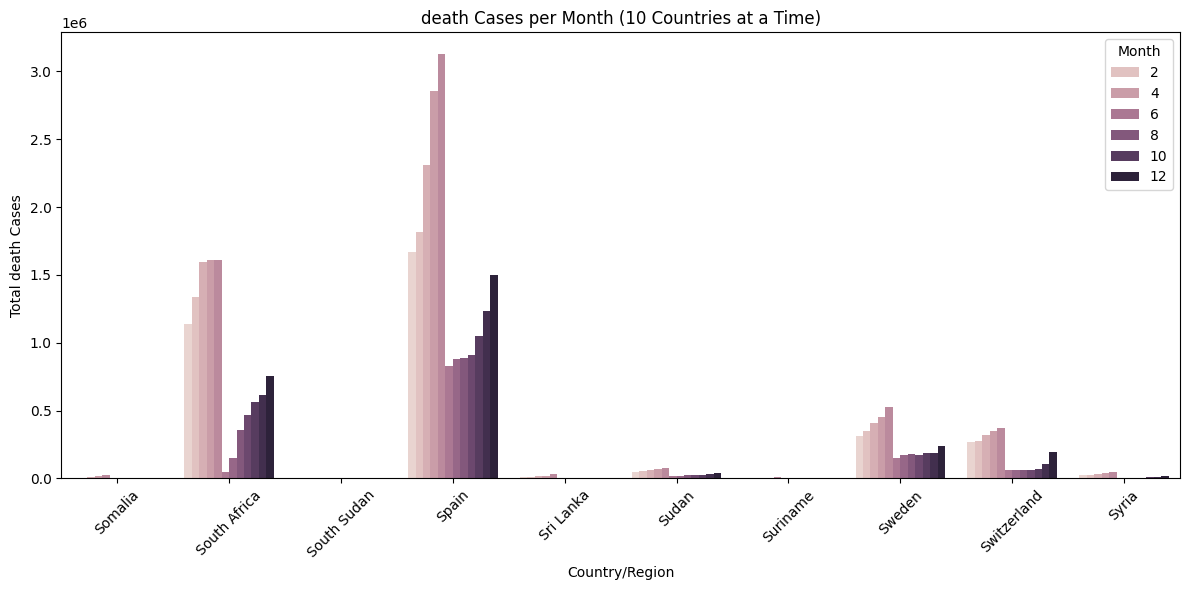

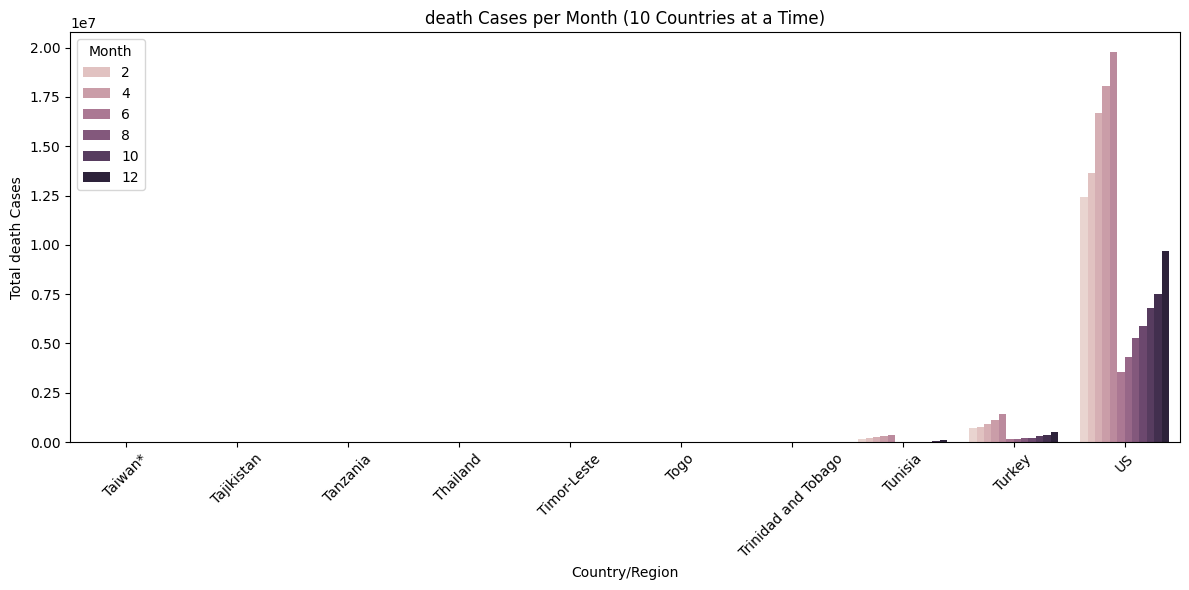

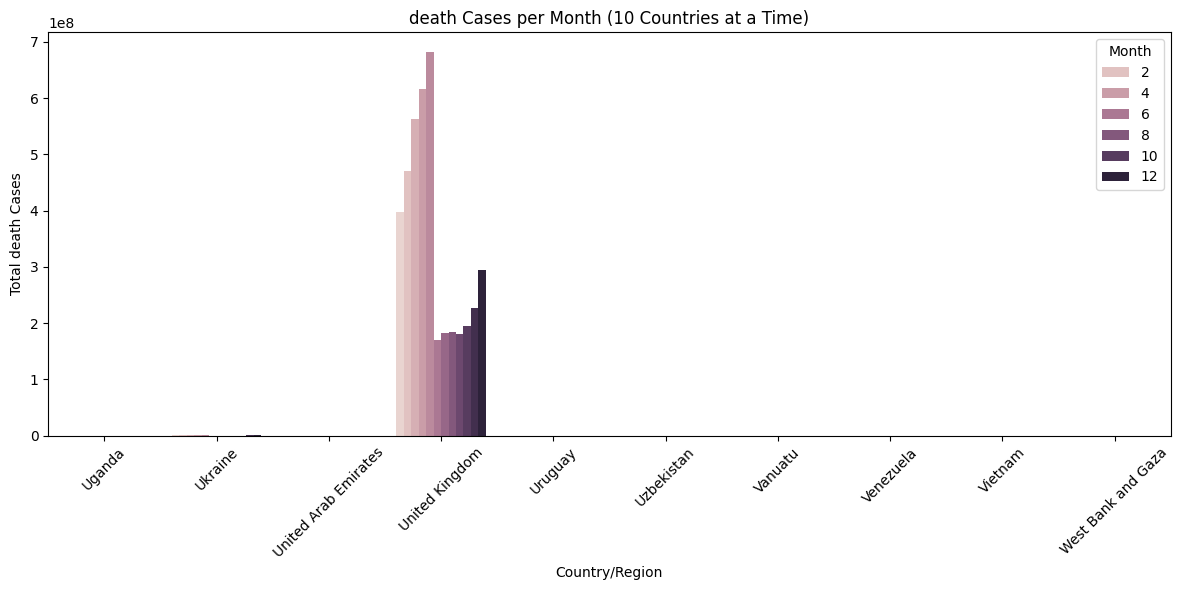

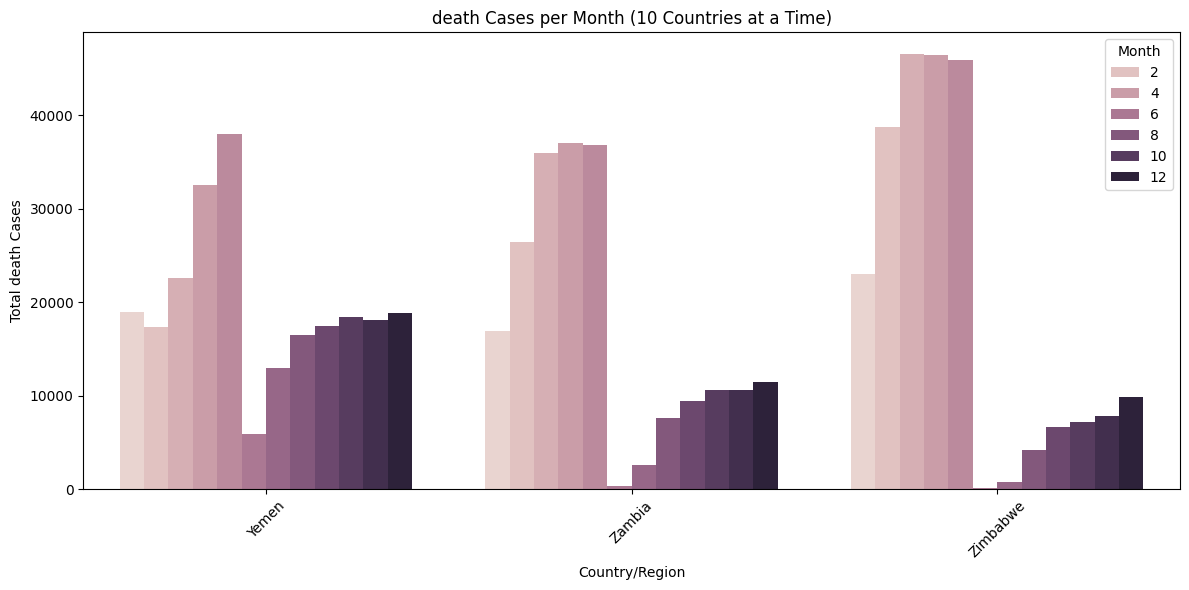

In [ ]:
countries = analyse_data_death_cases['Country/Region'].unique()

# Plot in batches of 10 countries
for i in range(0, len(countries), 10):
    batch_countries = countries[i:i+10]

    data = analyse_data_death_cases[analyse_data_death_cases['Country/Region'].isin(batch_countries)]

    plt.figure(figsize=(12, 6))
    sn.barplot(data=data,x='Country/Region',y='value_death',hue='Month')

    plt.xlabel("Country/Region")
    plt.ylabel("Total death Cases")
    plt.title("death Cases per Month (10 Countries at a Time)")
    plt.xticks(rotation=45)
    plt.legend(title='Month')
    plt.tight_layout()
    plt.show()

In [ ]:
analyse_data_recovery_cases =  analyse_data.groupby(['Country/Region','Month'])['value'].sum().reset_index()

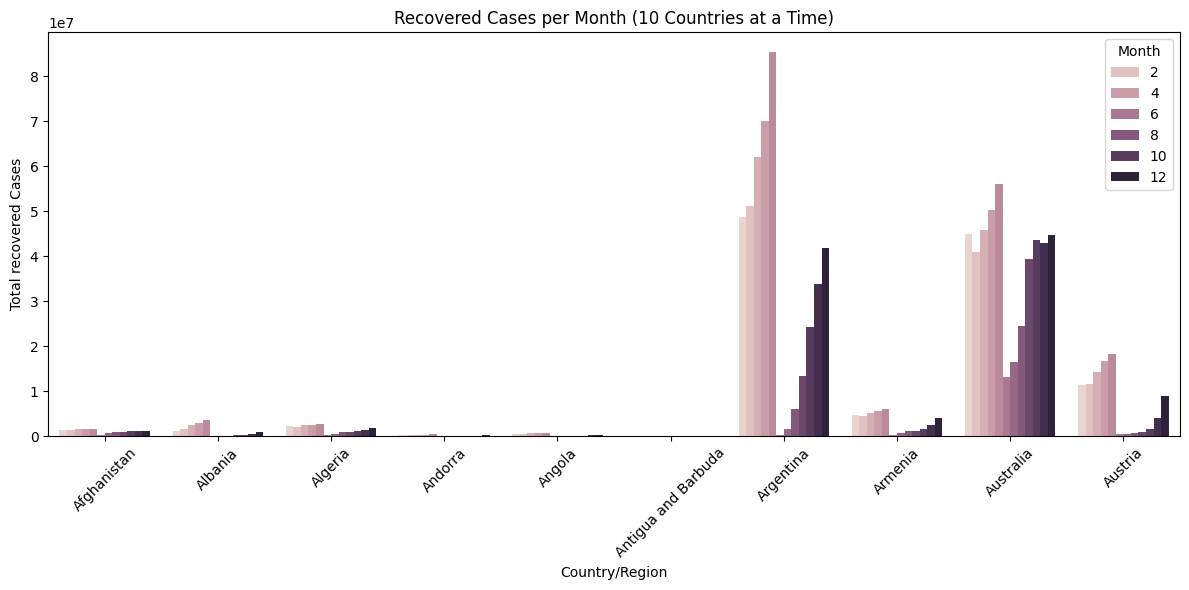

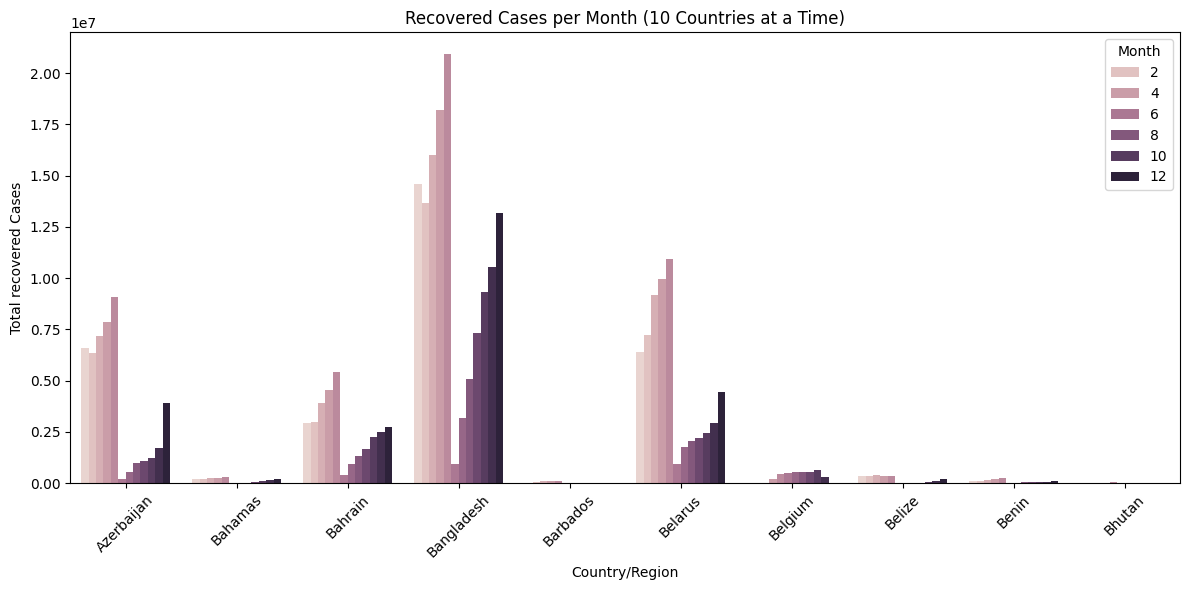

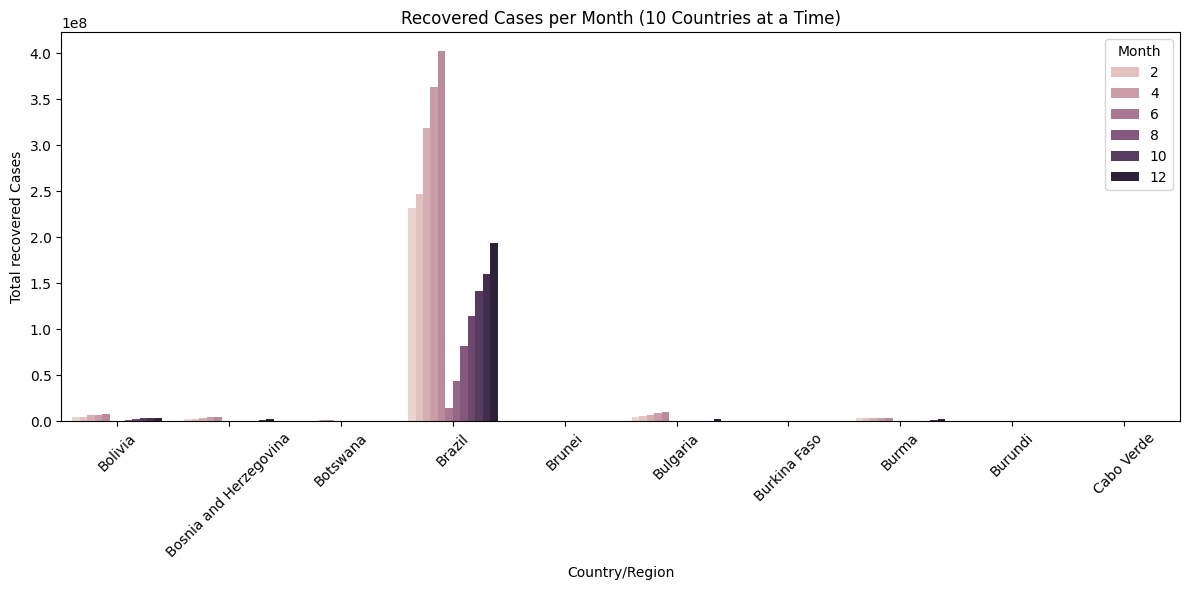

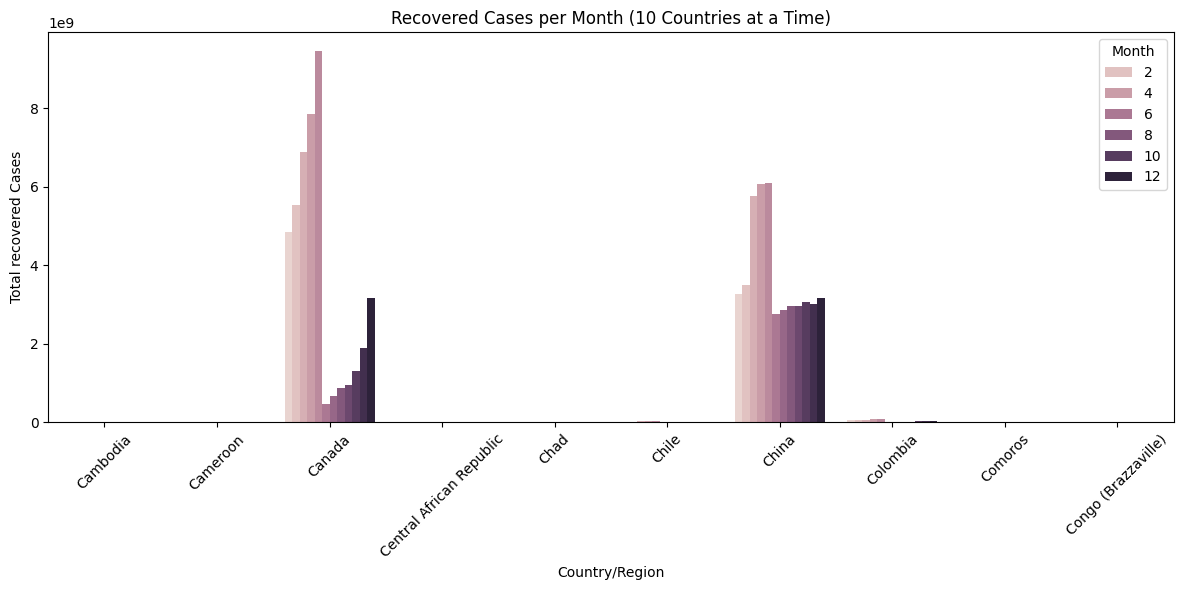

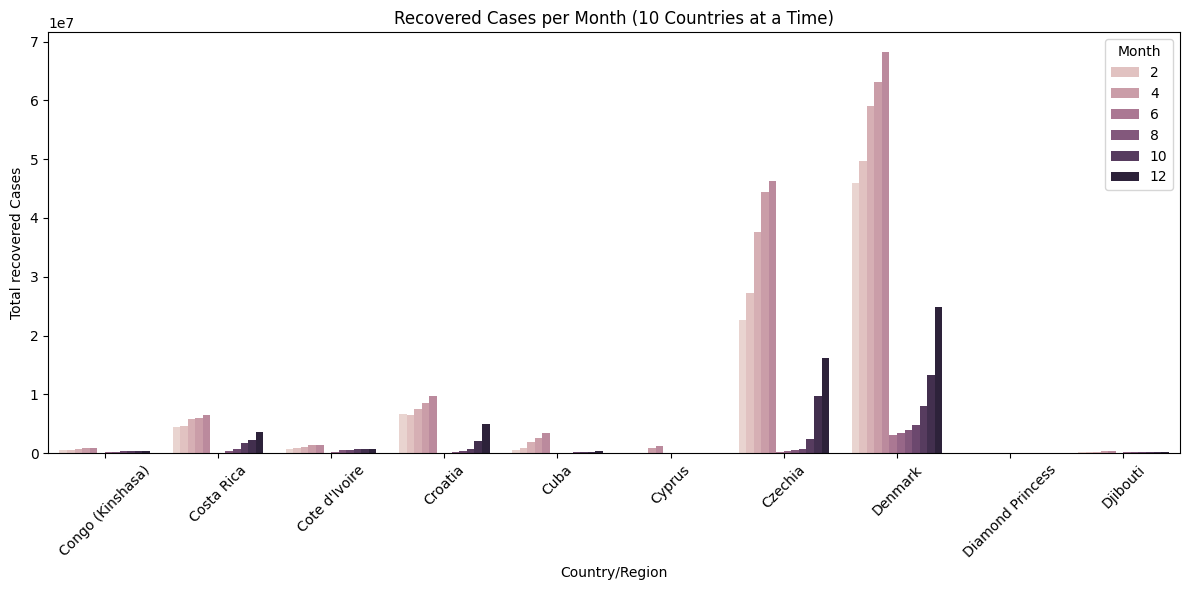

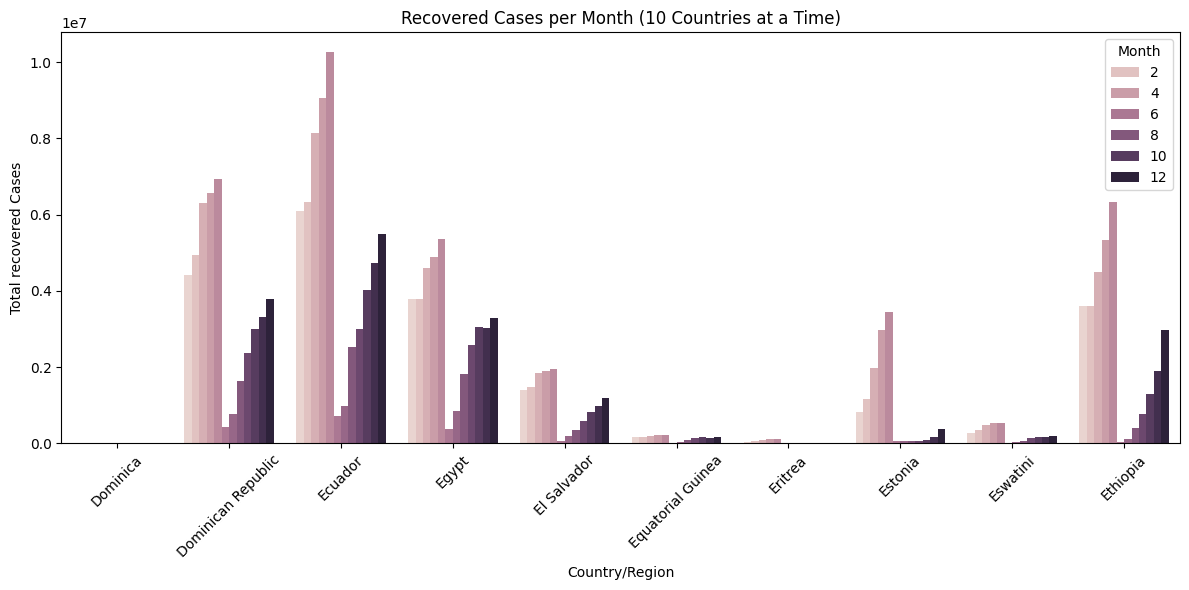

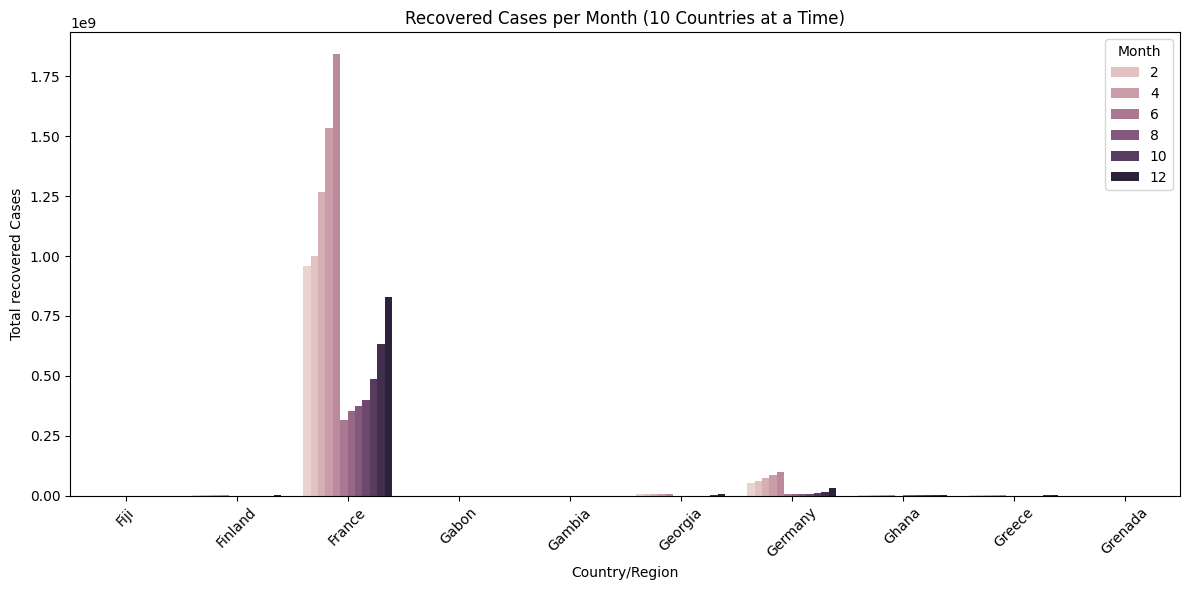

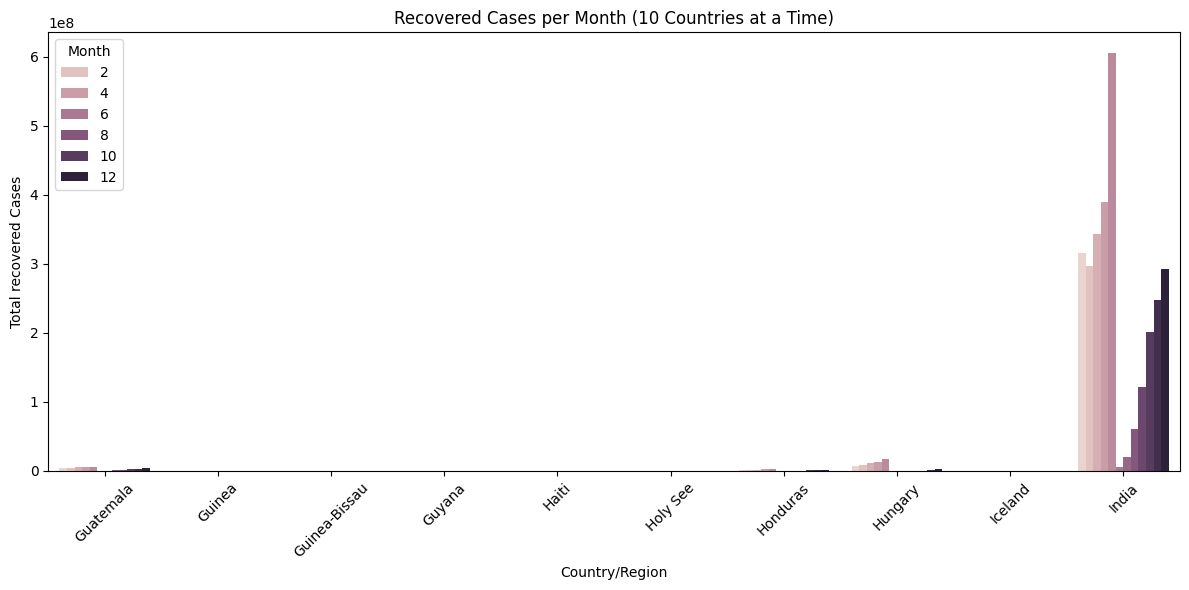

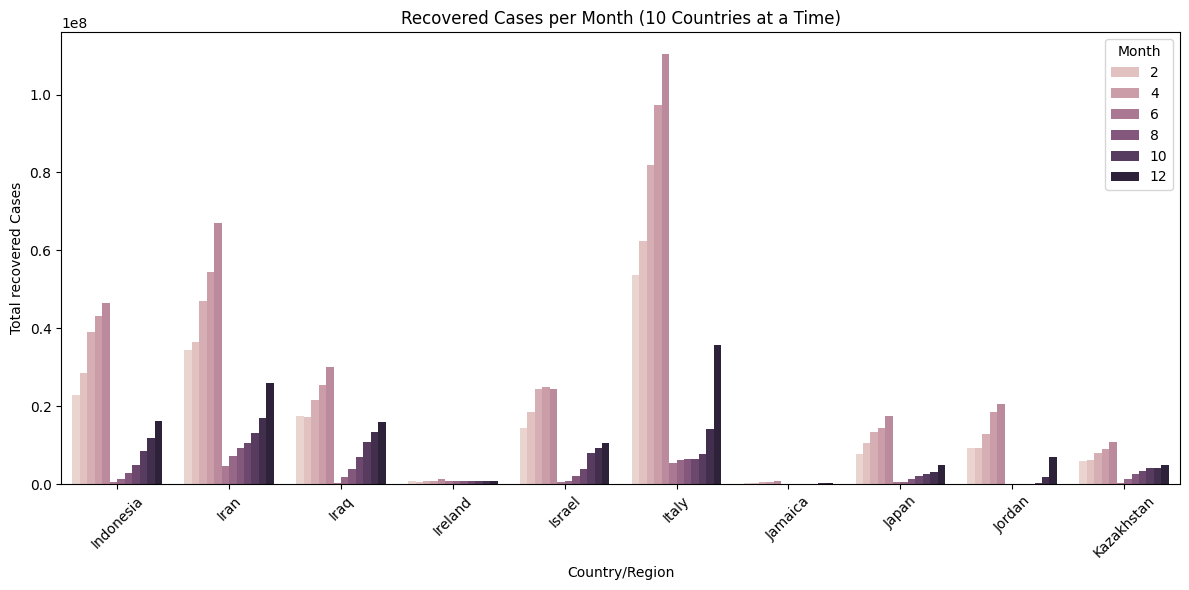

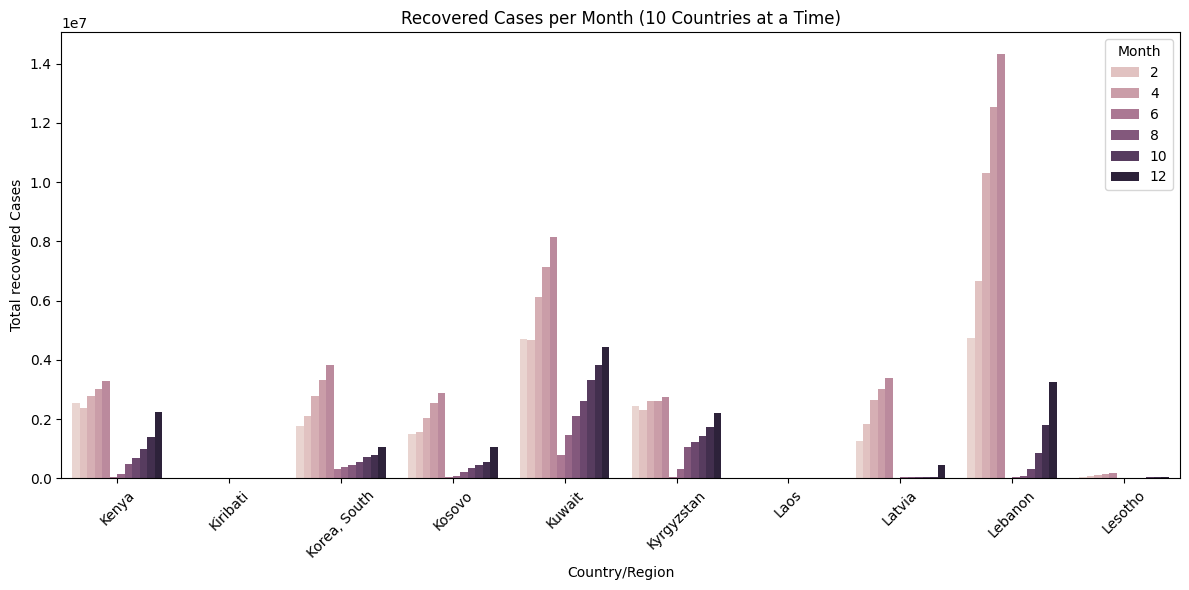

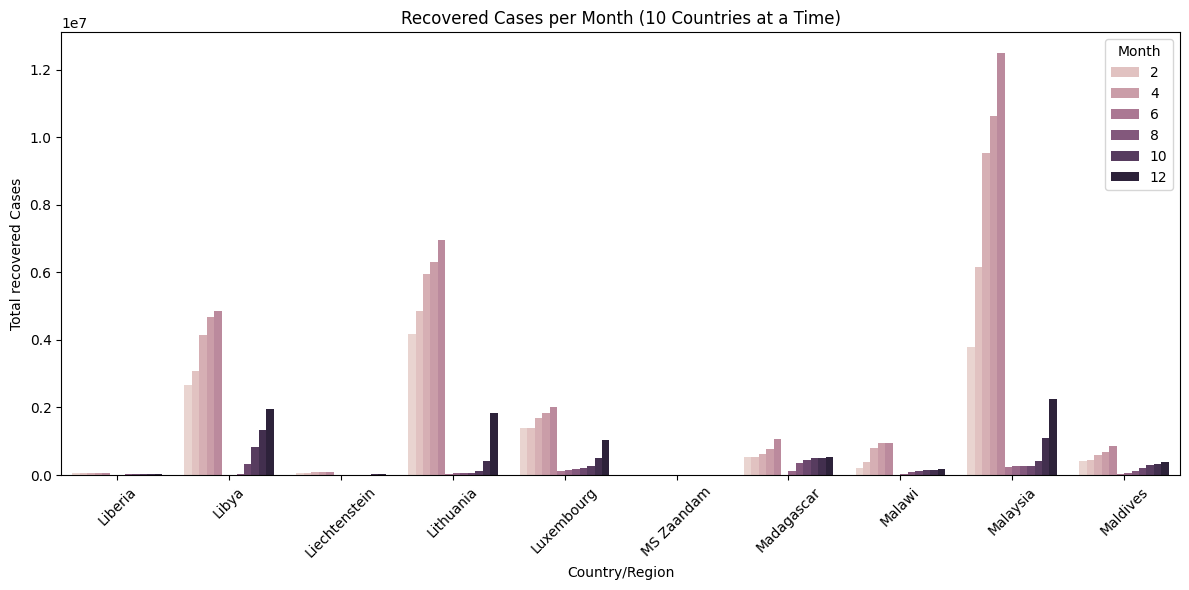

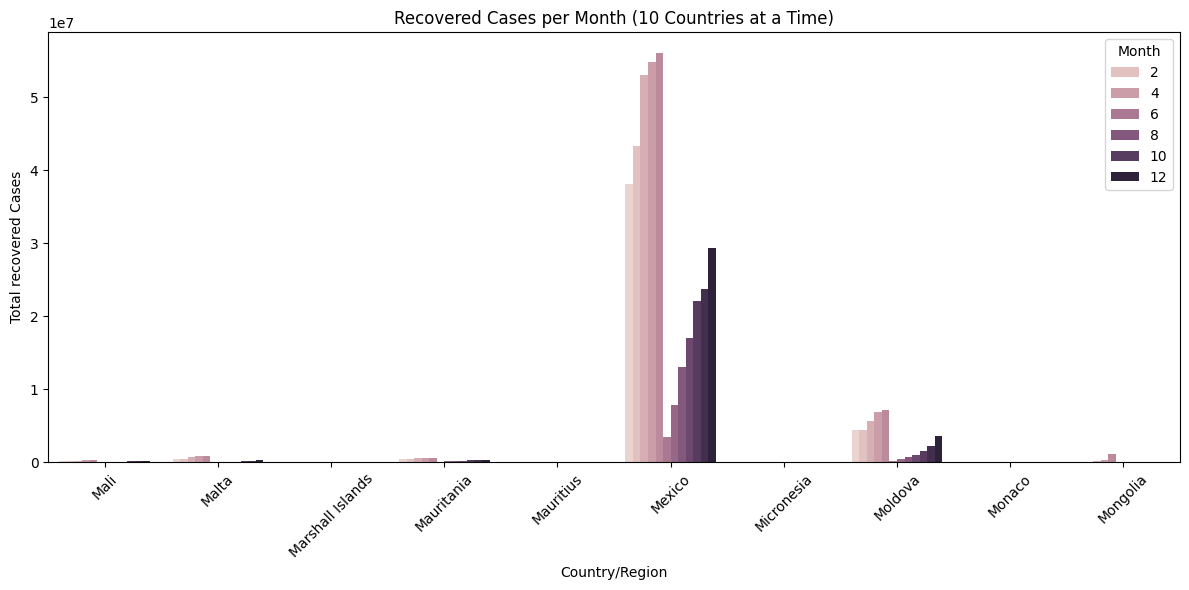

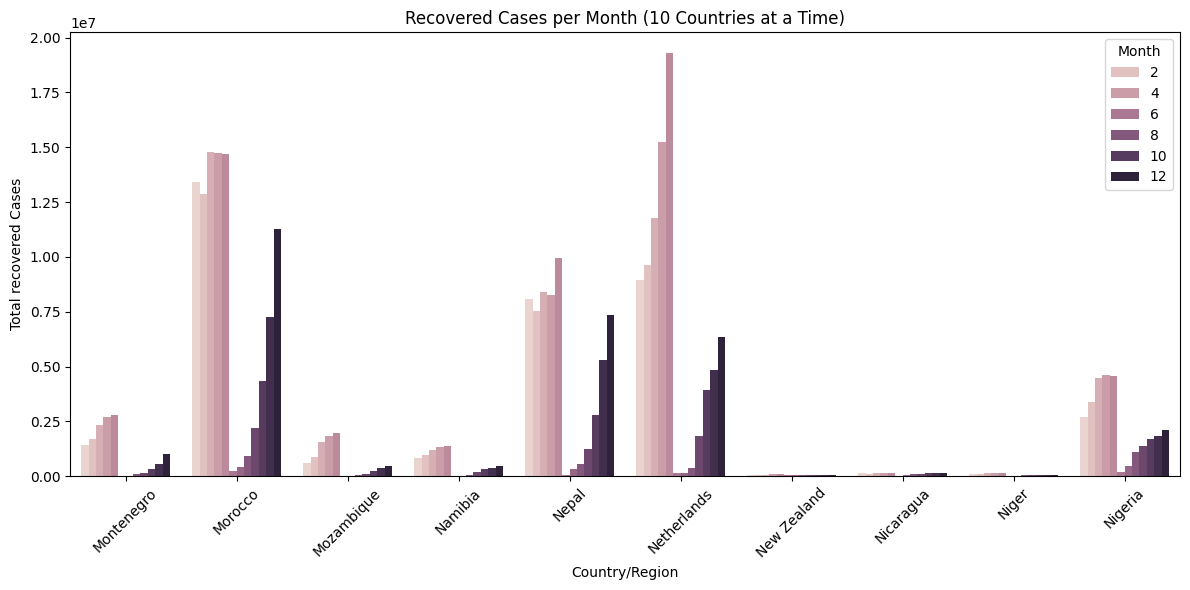

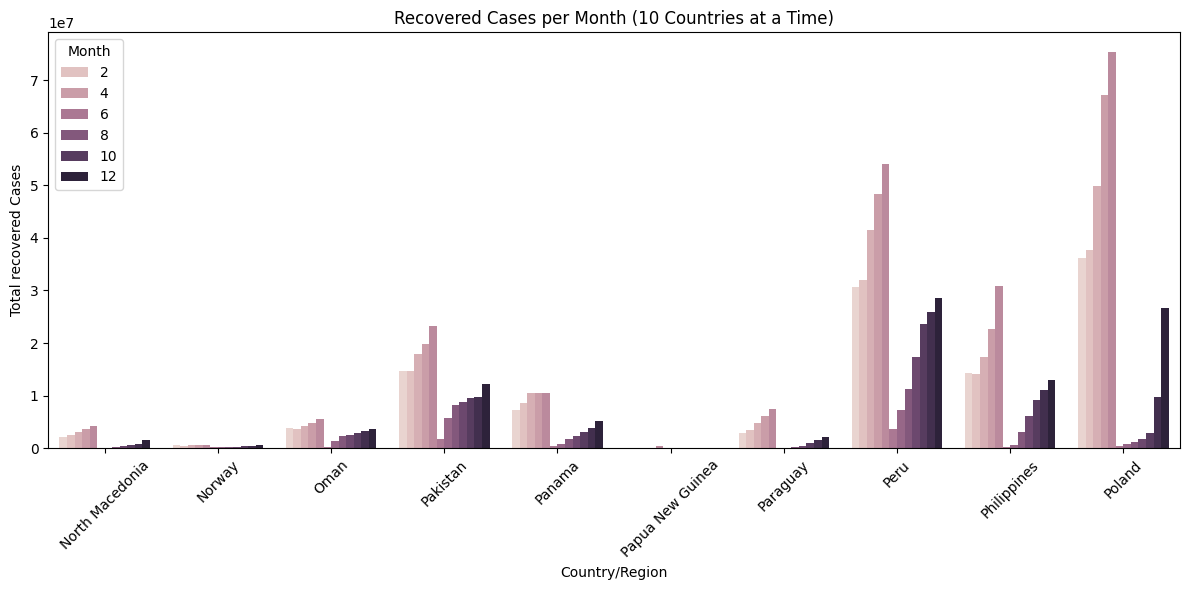

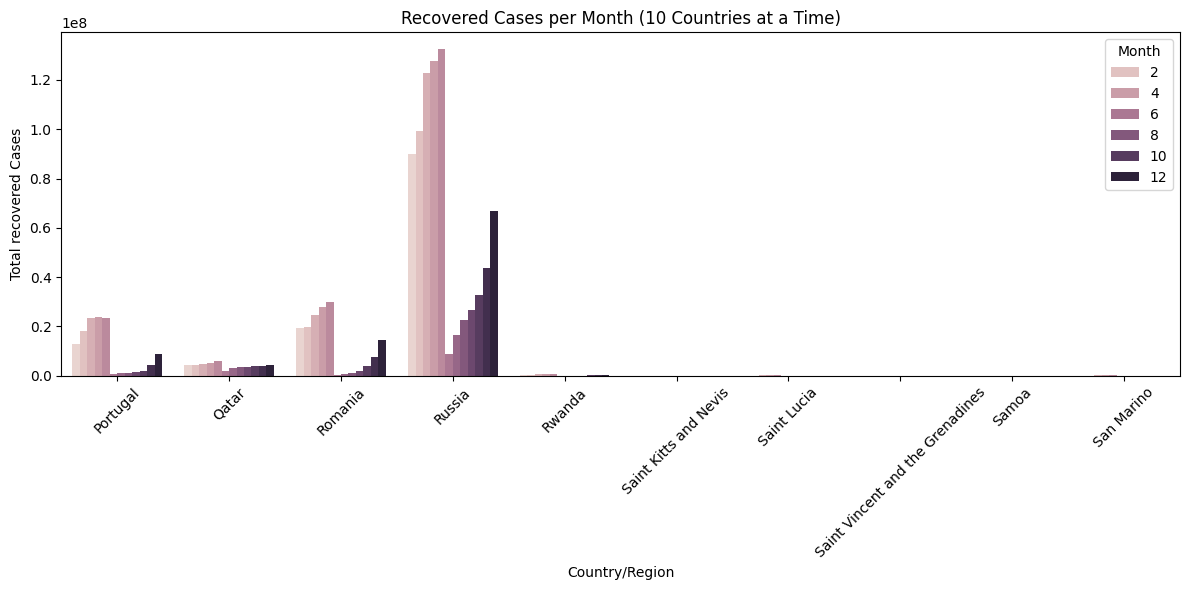

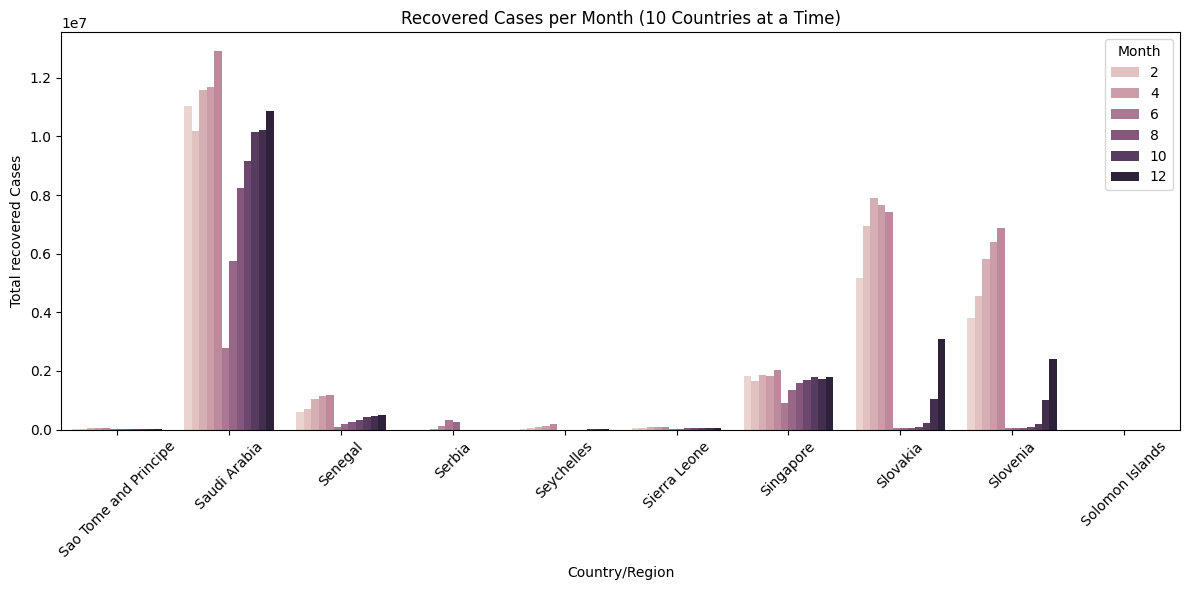

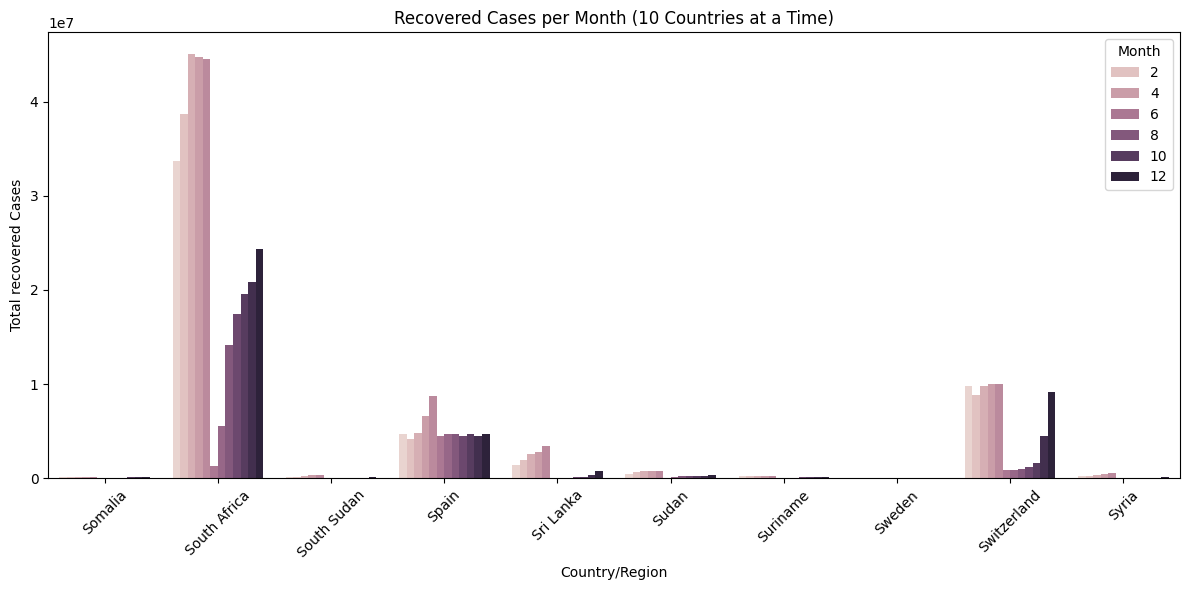

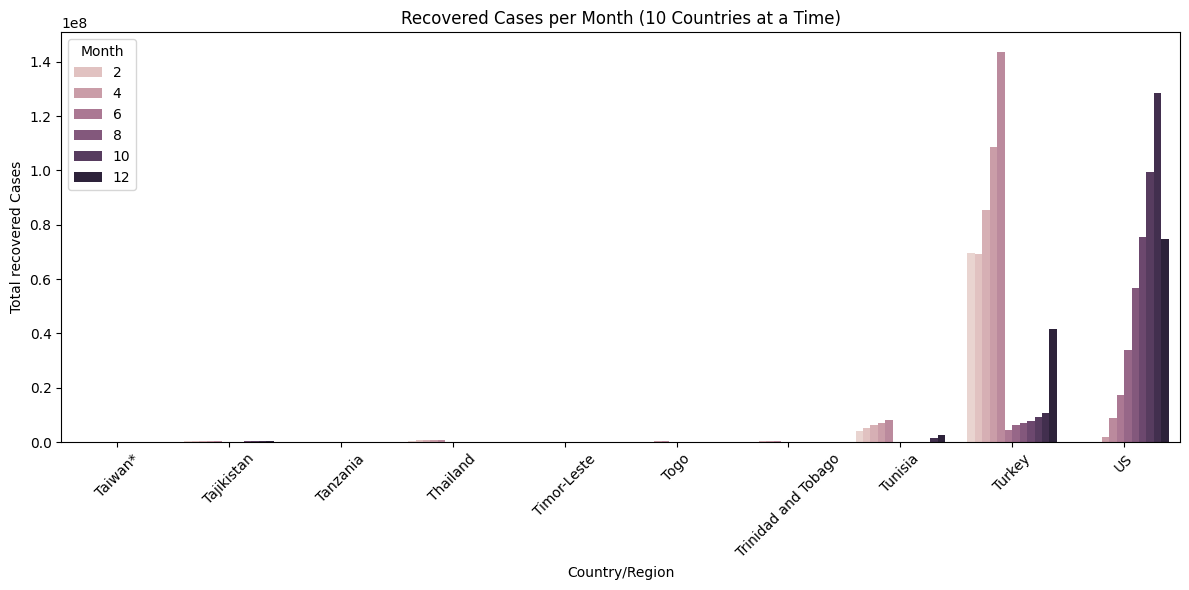

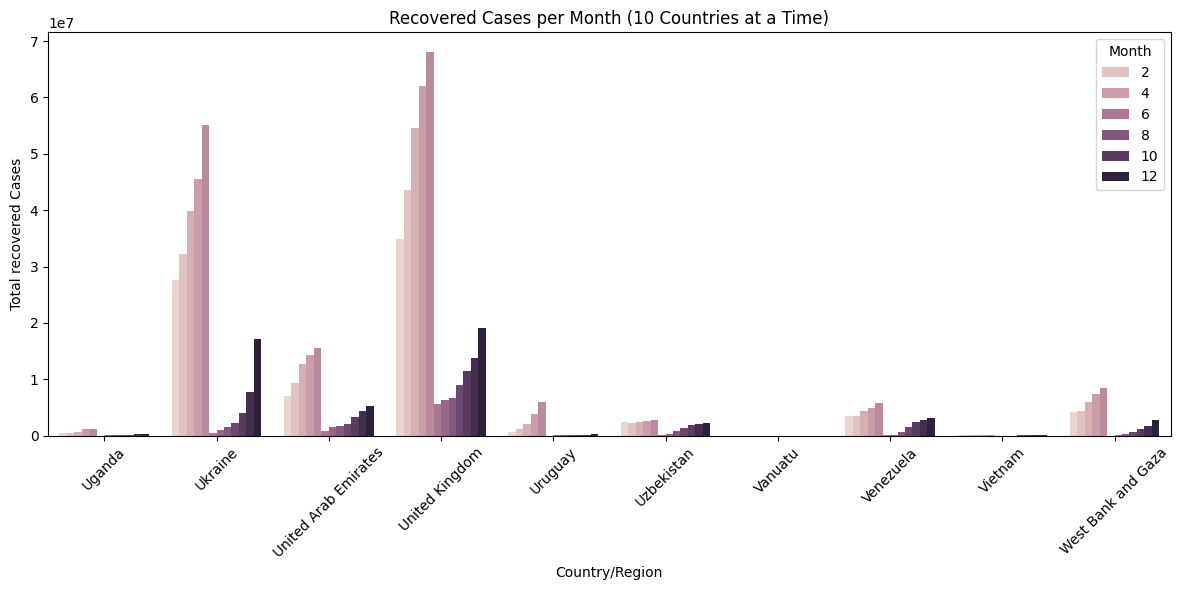

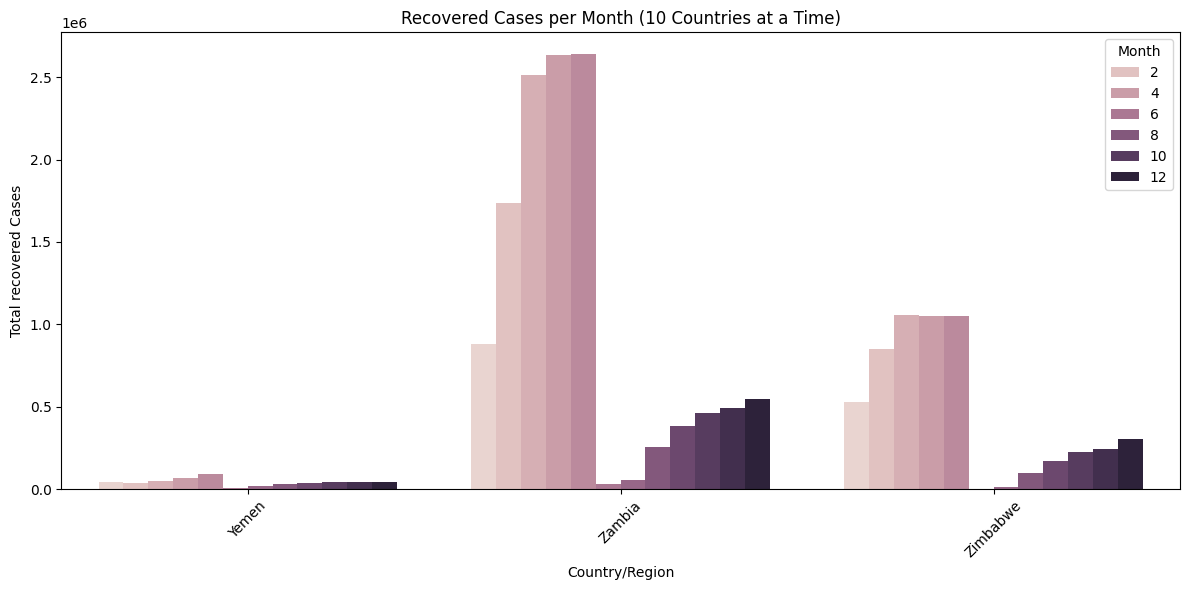

In [ ]:
countries = analyse_data_recovery_cases['Country/Region'].unique()

# Plot in batches of 10 countries
for i in range(0, len(countries), 10):
    batch_countries = countries[i:i+10]

    data = analyse_data_recovery_cases[analyse_data_recovery_cases['Country/Region'].isin(batch_countries)]

    plt.figure(figsize=(12, 6))
    sn.barplot(data=data,x='Country/Region',y='value',hue='Month')

    plt.xlabel("Country/Region")
    plt.ylabel("Total recovered Cases")
    plt.title("Recovered Cases per Month (10 Countries at a Time)")
    plt.xticks(rotation=45)
    plt.legend(title='Month')
    plt.tight_layout()
    plt.show()

Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

In [ ]:
three_country_data = Final_total_merge_data[Final_total_merge_data['Country/Region'].isin(['US', 'Italy', 'Brazil'])][['Country/Region', 'value_confirmed', 'value_death', 'value', 'Month']]

In [ ]:
three_country_data_confirm =  three_country_data.groupby(['Country/Region','Month'])['value_confirmed'].sum().reset_index()

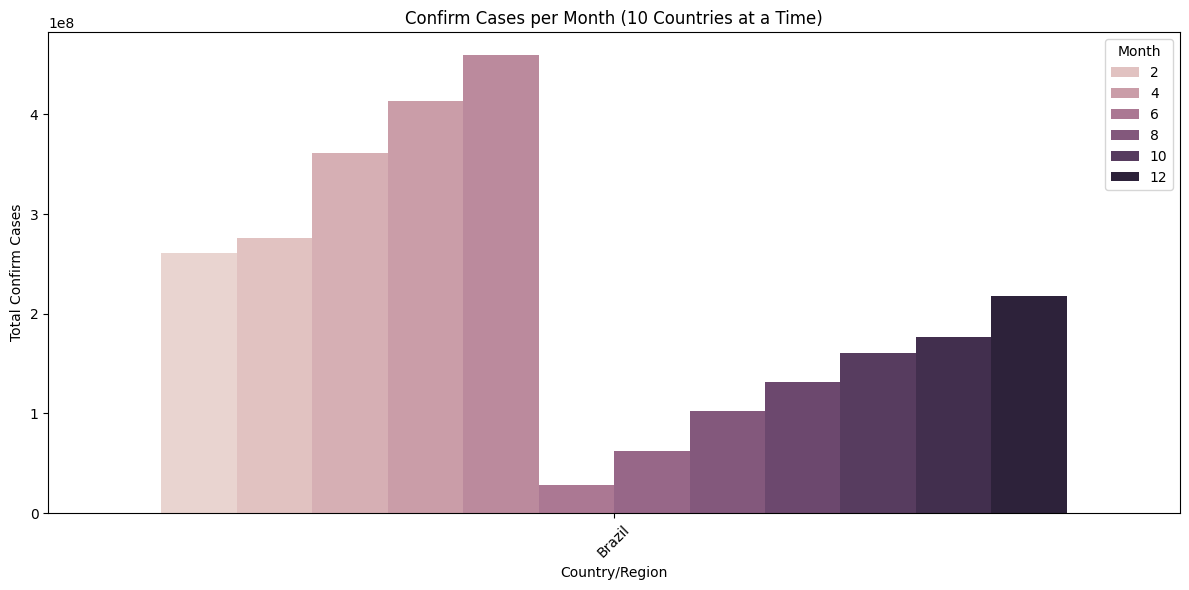

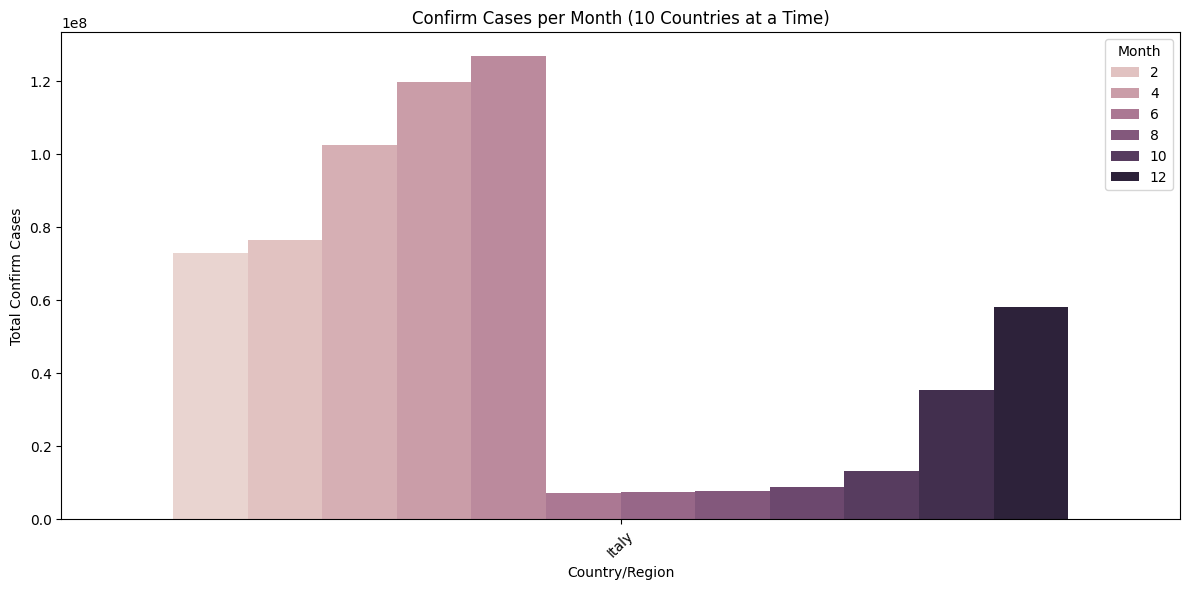

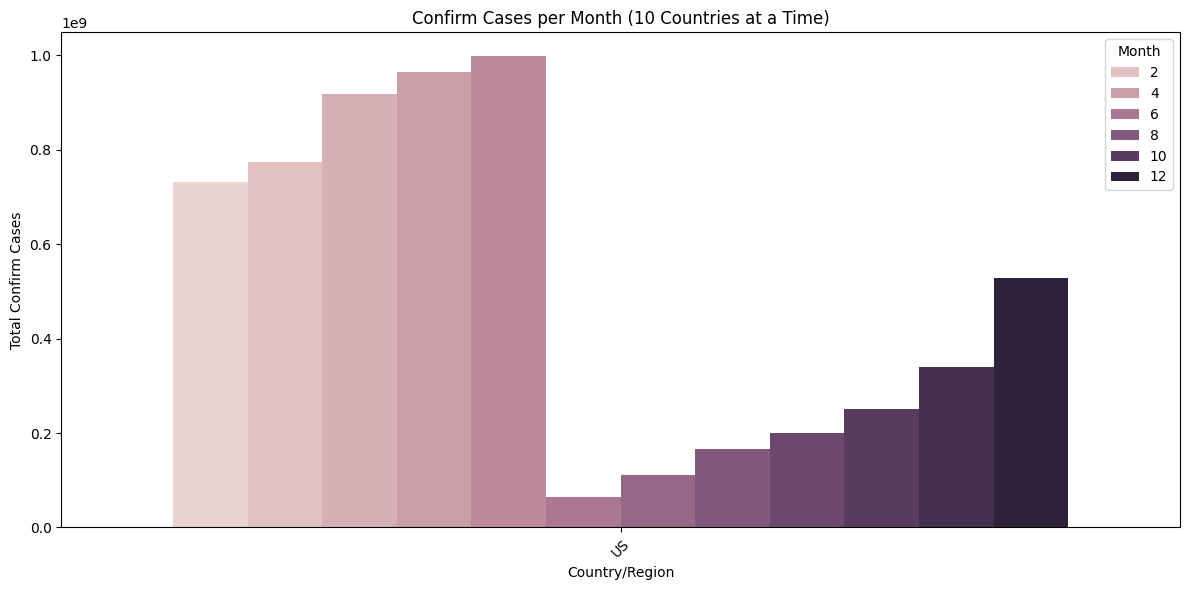

In [ ]:
countries = three_country_data['Country/Region'].unique()

# Plot in batches of 10 countries
for i in range(0, len(countries)):
    batch_countries = countries[i]

    data = three_country_data_confirm[three_country_data_confirm['Country/Region'] == batch_countries]

    plt.figure(figsize=(12, 6))
    sn.barplot(data=data,x='Country/Region',y='value_confirmed',hue='Month')

    plt.xlabel("Country/Region")
    plt.ylabel("Total Confirm Cases")
    plt.title("Confirm Cases per Month (10 Countries at a Time)")
    plt.xticks(rotation=45)
    plt.legend(title='Month')
    plt.tight_layout()
    plt.show()

In [ ]:
three_country_data_death =  three_country_data.groupby(['Country/Region','Month'])['value_death'].sum().reset_index()

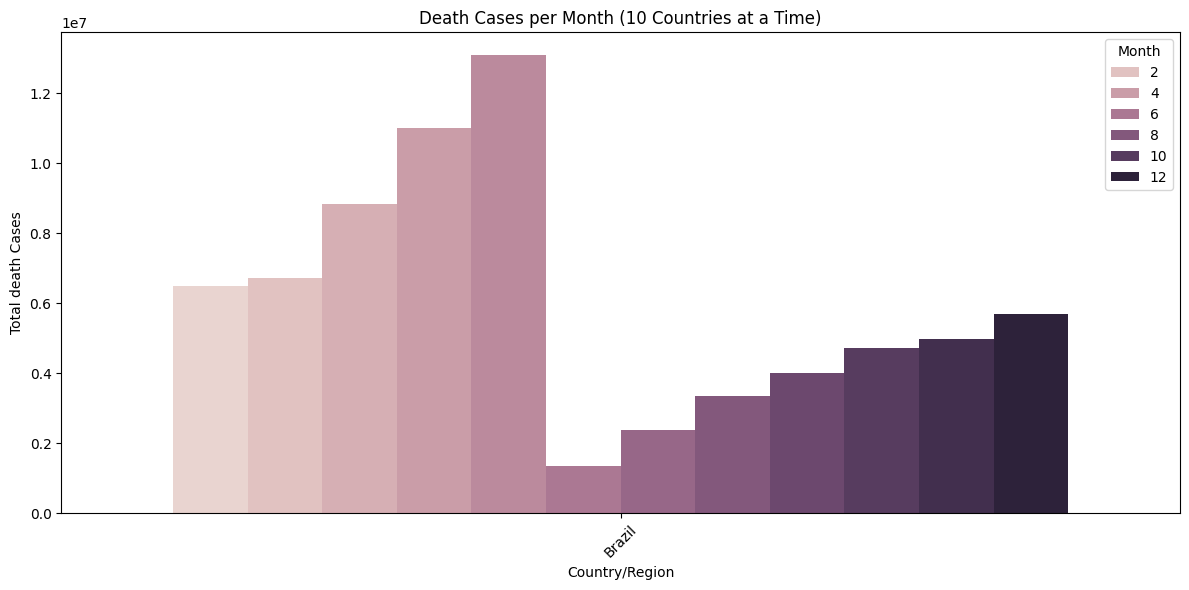

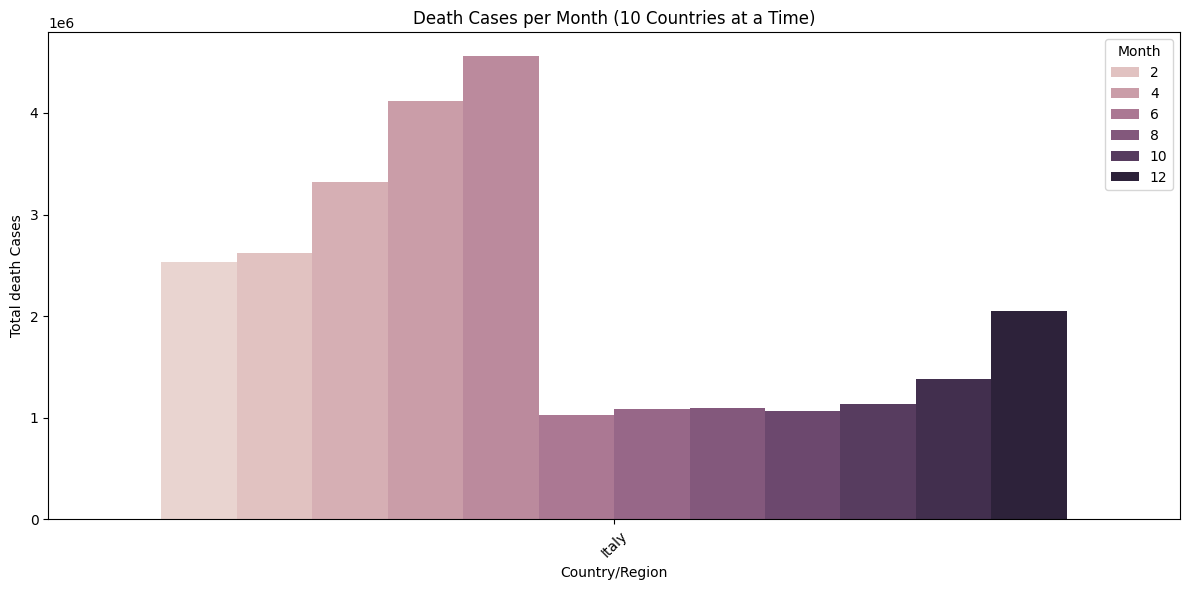

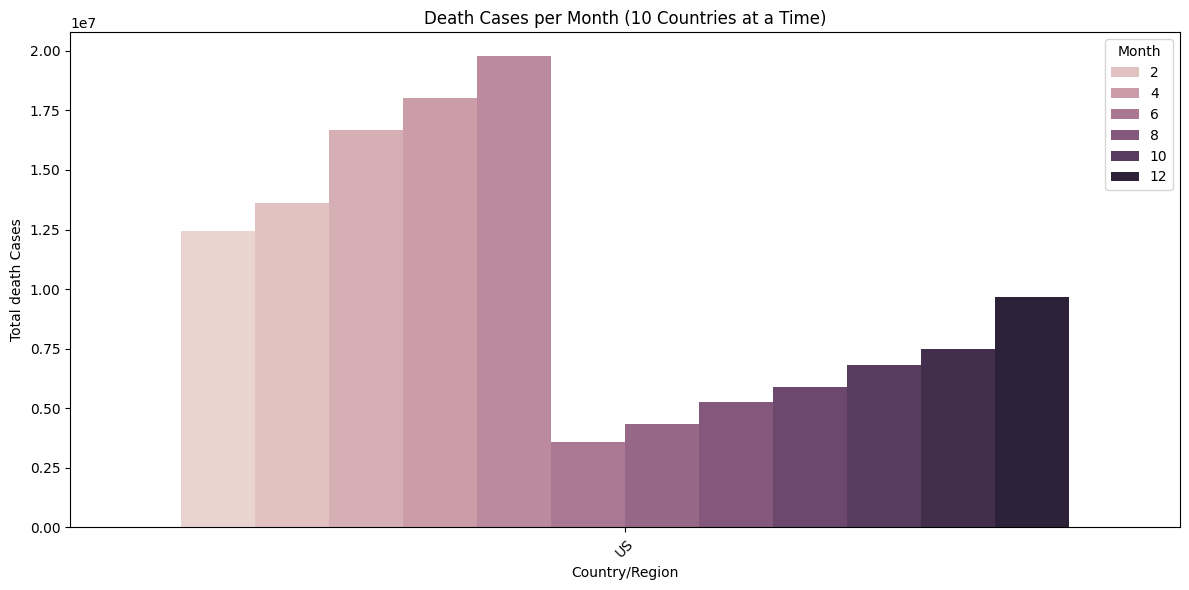

In [ ]:
countries = three_country_data['Country/Region'].unique()

# Plot in batches of 10 countries
for i in range(0, len(countries)):
    batch_countries = countries[i]

    data = three_country_data_death[three_country_data_death['Country/Region'] == batch_countries]

    plt.figure(figsize=(12, 6))
    sn.barplot(data=data,x='Country/Region',y='value_death',hue='Month')

    plt.xlabel("Country/Region")
    plt.ylabel("Total death Cases")
    plt.title("Death Cases per Month (10 Countries at a Time)")
    plt.xticks(rotation=45)
    plt.legend(title='Month')
    plt.tight_layout()
    plt.show()

In [ ]:
three_country_data_recovery =  three_country_data.groupby(['Country/Region','Month'])['value'].sum().reset_index()

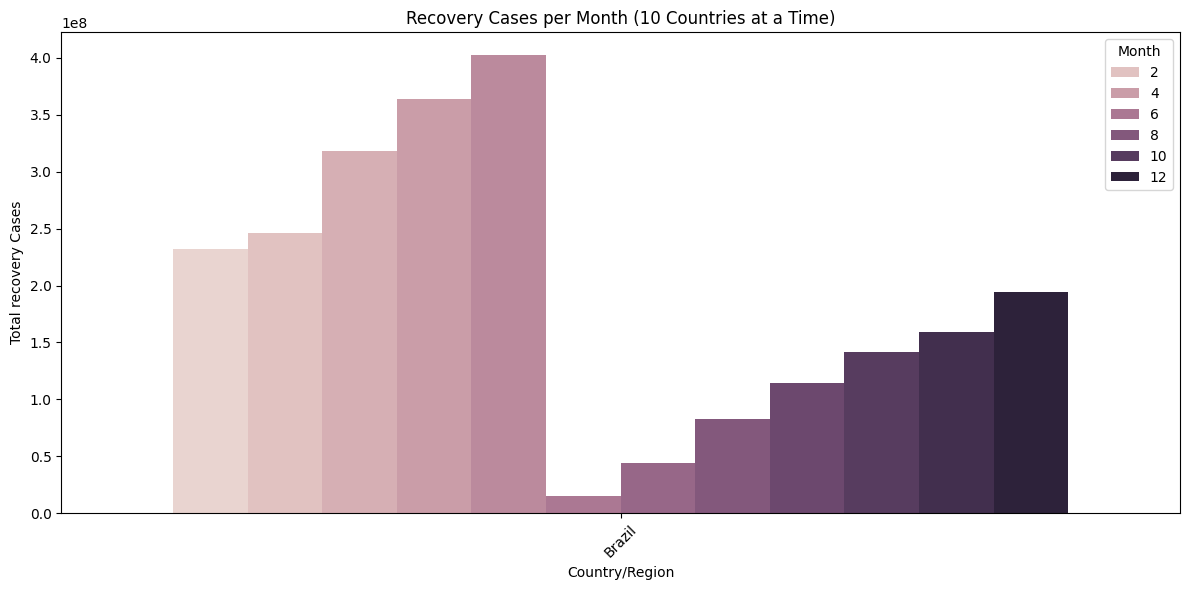

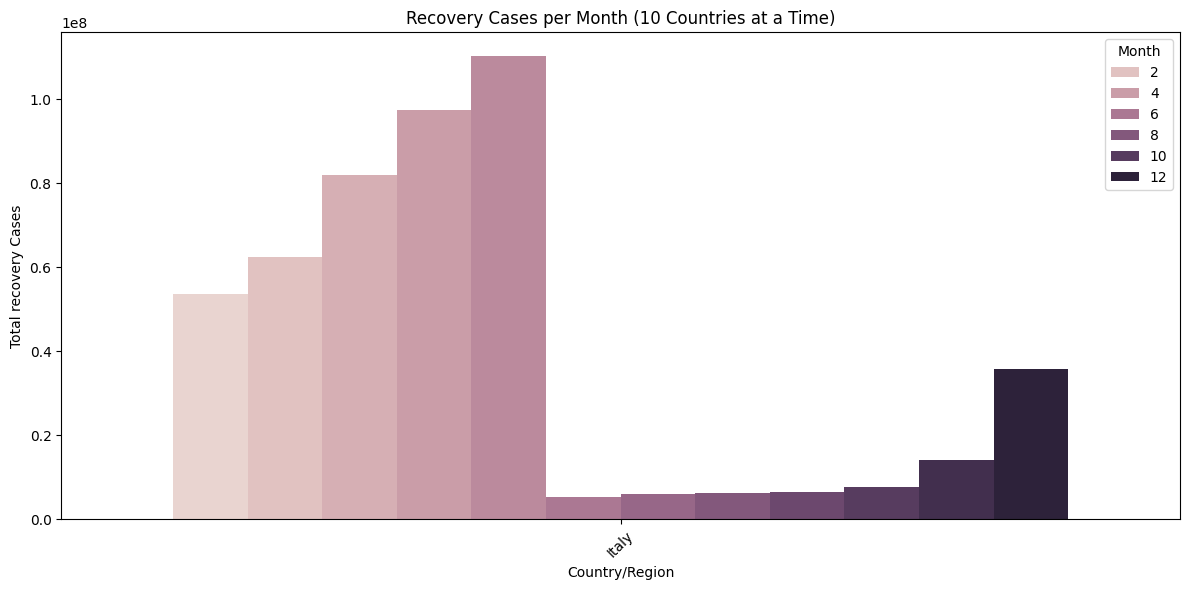

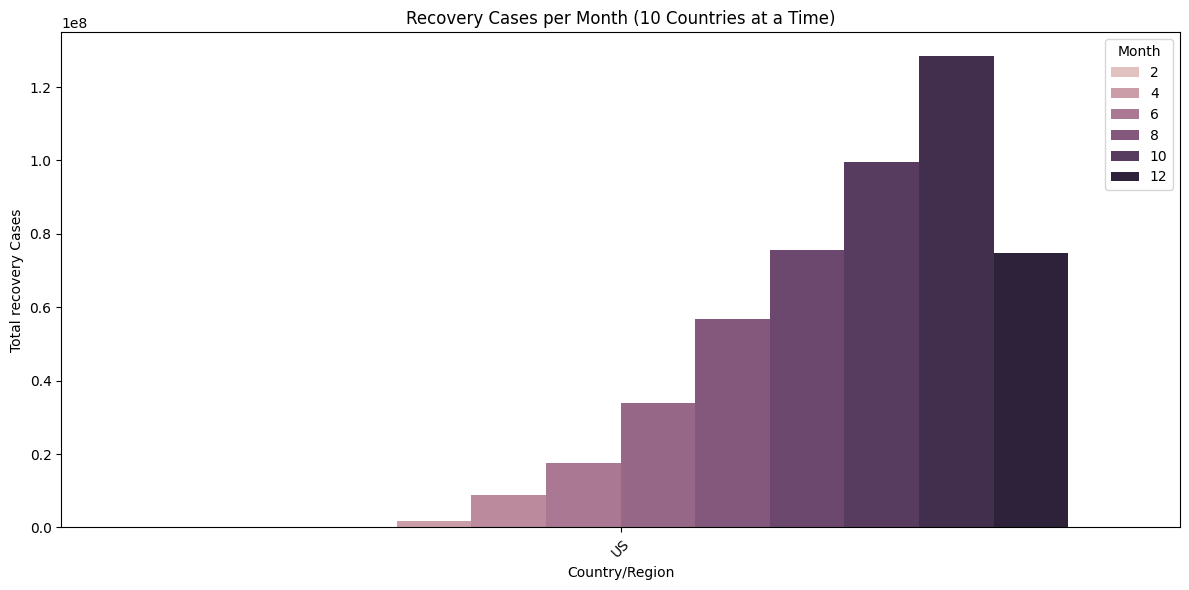

In [ ]:
countries = three_country_data['Country/Region'].unique()

# Plot in batches of 10 countries
for i in range(0, len(countries)):
    batch_countries = countries[i]

    data = three_country_data_recovery[three_country_data_recovery['Country/Region'] == batch_countries]

    plt.figure(figsize=(12, 6))
    sn.barplot(data=data,x='Country/Region',y='value',hue='Month')

    plt.xlabel("Country/Region")
    plt.ylabel("Total recovery Cases")
    plt.title("Recovery Cases per Month (10 Countries at a Time)")
    plt.xticks(rotation=45)
    plt.legend(title='Month')
    plt.tight_layout()
    plt.show()

**Question 8: Combined Data Analysis**

Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?

In [ ]:
data_merge=Final_total_merge_data[Final_total_merge_data['Year']==2020][['Country/Region','value_confirmed','value_death','Year']]

In [ ]:
data_merge['death_rate'] = (data_merge['value_death']/data_merge['value_confirmed']).fillna(0)

In [ ]:
data_merge_death = data_merge.groupby('Country/Region')['death_rate'].mean().reset_index()

Highest country of avearge death rate is of Australia, France and Canada

In [ ]:
data_merge_death.sort_values(by='death_rate', ascending=False).head(3)

Country/Region  death_rate
8       Australia         inf
62         France         inf
32         Canada         inf

Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

In [ ]:
south_africa_data = Final_total_merge_data[Final_total_merge_data['Country/Region']=='South Africa']

In [ ]:
total_death_cases =  np.sum(south_africa_data['value_death'])
total_recovery_cases = np.sum(south_africa_data['value'])

In [ ]:
total_death_cases

np.int64(10250036)

As comparing recovery cases are more as compare to the death cases in south africa

In [ ]:
total_recovery_cases

np.int64(310037573)

Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

In [ ]:
US_Merge_Data = Final_total_merge_data[
    (Final_total_merge_data['Country/Region'] == 'US') &
    (Final_total_merge_data['Date_Confirmed'] >= '2020-03-01') &
    (Final_total_merge_data['Date_Confirmed'] <= '2021-05-31')]

In [ ]:
US_Merge_Data = US_Merge_Data.groupby(['Month','Year']).agg({'value_confirmed':'sum','value':'sum'}).reset_index().sort_values(by=['Year', 'Month'])

In [ ]:
US_Merge_Data['Recovery_Ratio'] = (US_Merge_Data['value']/US_Merge_Data['value_confirmed'])*100

In [ ]:
US_Merge_Data.sort_values(by='Recovery_Ratio', ascending=False)

Month  Year  value_confirmed      value  Recovery_Ratio
12     10  2020        251406215   99506279       39.579880
11      9  2020        199220181   75486815       37.891149
13     11  2020        339796331  128470711       37.808151
10      8  2020        166357378   56877502       34.189949
9       7  2020        111371152   34028380       30.554034
8       6  2020         64964762   17434297       26.836544
6       5  2020         45533906    8720047       19.150668
14     12  2020        528139775   74680002       14.140197
4       4  2020         19959287    1747977        8.757713
2       3  2020          1120122      19730        1.761415
0       1  2021        730894746          0        0.000000
1       2  2021        774254261          0        0.000000
3       3  2021        916643837          0        0.000000
5       4  2021        944543693          0        0.000000
7       5  2021        953529915          0        0.000000

The United States recorded its highest recovery rate in October 2020

In [ ]:
US_Merge_Data.sort_values(by='Recovery_Ratio', ascending=False).head(1)

Month  Year  value_confirmed     value  Recovery_Ratio
12     10  2020        251406215  99506279        39.57988